# **<h3 align="center">Machine Learning - Project</h3>**
## **<h3 align="center">Group 30 - Project</h3>**

**Group members:**<br>Alexandra Pinto - 20211599@novaims.unl.pt - 20211599<br>
Gonçalo Peres - 20211625@novaims.unl.pt - 20211625<br>
Leonor Mira - 20240658@novaims.unl.pt - 20240658<br>
Miguel Natário - 20240498@novaims.unl.pt - 20240498<br>
Nuno Bernardino  - 2021546@novaims.unl.pt - 2021546<br>

## Table of Contents
* [1. Import the Libraries](#chapter1)
* [2. Import the Datasets](#chapter2)
* [3. Explore the Dataset ](#chapter3)
    * [Basic Statistics](#section_3_1)  #this need to be changed
    * [Inconsistencies](#section_3_2) 
    * [Visualization](#section_3_3)  
* [4. Preprocessing the Data](#chapter4)
    * [Missing Values](#section_4_1)  
    * [Outliers](#section_4_2) #boxplots for ex
    * [Categorical](#section_4_3)  #encoding por ex
* [5. Feature Engineering](#chapter5)
* [6. Feature Selection](#chapter6)
    * [Scaling the Data](#section_6_1)  
    * [Numerical Features](#section_6_2) 
    * [Categorical Features](#section_6_3) 
    * [Final Features](#section_6_3)
* [7. Modeling](#chapter7) 

# 1. Import the Libraries<a class="anchor" id="chapter1"></a>

In [514]:
#importing standard data science libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import zipfiles

# 2. Import the Datasets <a class="anchor" id="chapter2"></a>
Before importing the datasets, we need to unzip the data file.

In [515]:
# zip_path = r'../Data.zip'  # Adjust based on actual location
# extract_to_path = '../project_data'

# # Extract files
# with zipfile.ZipFile(zip_path, 'r') as zip_ref:
#     zip_ref.extractall(extract_to_path)

# print("Extraction complete.")

In the following cell we will import the datasets and set Claim Identifier as our index.

In [516]:
df_train = pd.read_csv('../project_data/Data/train_data.csv', index_col='Claim Identifier')
df_test = pd.read_csv('../project_data/Data/test_data.csv',index_col='Claim Identifier')

C:\Users\xandg\AppData\Local\Temp\ipykernel_2540\3257207922.py:1: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv('../project_data/Data/train_data.csv', index_col='Claim Identifier')


To check that the imports really worked, we will use .head().

In [517]:
df_train.head(2)

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,
5393875,2019-12-30,31.0,N,2020-01-01,N,0.00,1988.0,2019-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,...,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,0.0,Not Work Related,1.0
5393091,2019-08-30,46.0,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,...,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,1.0,Not Work Related,4.0


In [518]:
df_test.head(2)


,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,
6165911,2022-12-24,19,N,2023-01-02,N,NaN,2003.0,2023-01-02,NaN,INDEMNITY INSURANCE CO OF,...,IV,NaN,31.0,"FALL, SLIP OR TRIP, NOC",10.0,CONTUSION,54.0,LOWER LEG,10466,1
6166141,2022-11-20,19,N,2023-01-02,N,NaN,2003.0,2023-01-02,NaN,A I U INSURANCE COMPANY,...,IV,NaN,75.0,FALLING OR FLYING OBJECT,10.0,CONTUSION,10.0,MULTIPLE HEAD INJURY,11691,1


## 3. Explore the Dataset <a class="anchor" id="chapter3"></a>
In this chapter we will perform the basic steps to get to know our dataset.

## 3.1. Basic Statistics <a class="anchor" id="section_3_1"></a>

The <span style='color:Blue'> info()  </span> method prints information about the dataframe.

In [519]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 593471 entries, 5393875 to 818961390
Data columns (total 32 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       570337 non-null  object 
 1   Age at Injury                       574026 non-null  float64
 2   Alternative Dispute Resolution      574026 non-null  object 
 3   Assembly Date                       593471 non-null  object 
 4   Attorney/Representative             574026 non-null  object 
 5   Average Weekly Wage                 545375 non-null  float64
 6   Birth Year                          544948 non-null  float64
 7   C-2 Date                            559466 non-null  object 
 8   C-3 Date                            187245 non-null  object 
 9   Carrier Name                        574026 non-null  object 
 10  Carrier Type                        574026 non-null  object 
 11  Claim Injury Type


***Some conclusions from the output above**: 
- some datatypes need to be changed, such as:
    - 'Accident Date', 'Assembly Date', 'C-2 Date', 'C-3 Date', 'First Hearing Date' can be datetime;
    - 'Industry Code', 'Zip Code', 'WCIO Part Of Body Code', 'WCIO Cause of Injury Code ', 'WCIO Nature of Injury Code' are integers instead of float  --> since we have some missing valyes we will do it after treating them
    - same with 'Birth Year', and 'Age at Injury' --> since we have some missing valyes we will do it after treating them
- we have some missing values (this will be treated in 4.1.Missing values);
- we can also see that  'OIICS Nature of Injury Description' has only missing values, for this motive, we can already delete from our dataset;


In [520]:
#Converting Date Columns
# Convert columns to datetime format
date_columns = ['Accident Date', 'Assembly Date', 'C-2 Date', 'C-3 Date', 'First Hearing Date']
for col in date_columns:
    df_train[col] = pd.to_datetime(df_train[col], errors='coerce')
    #Do the same for test
    df_test[col] = pd.to_datetime(df_test[col], errors='coerce')

In [521]:
# # Convert columns to integer format (instead of float), using nullable integer type to handle NaNs
# int_columns = ['Industry Code', 'Zip Code', 'WCIO Part Of Body Code', 'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code', 'Birth Year', 'Age at Injury']
# for col in int_columns:
#     df_train[col] = pd.to_numeric(df_train[col], errors='coerce').astype('Int64')


In [522]:
# Drop the column with only missing values
df_train.drop(columns=['OIICS Nature of Injury Description'], inplace=True)

# Do the same for test
df_test.drop(columns=['OIICS Nature of Injury Description'], inplace=True)

In [523]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 593471 entries, 5393875 to 818961390
Data columns (total 31 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   Accident Date                      570337 non-null  datetime64[ns]
 1   Age at Injury                      574026 non-null  float64       
 2   Alternative Dispute Resolution     574026 non-null  object        
 3   Assembly Date                      593471 non-null  datetime64[ns]
 4   Attorney/Representative            574026 non-null  object        
 5   Average Weekly Wage                545375 non-null  float64       
 6   Birth Year                         544948 non-null  float64       
 7   C-2 Date                           559466 non-null  datetime64[ns]
 8   C-3 Date                           187245 non-null  datetime64[ns]
 9   Carrier Name                       574026 non-null  object        
 10  Carrier Typ

In [524]:
# # # Convert object columns to category
# categorical_columns = ['Alternative Dispute Resolution', 'Carrier Name', 'Carrier Type', 
#                        'Claim Injury Type', 'County of Injury', 'COVID-19 Indicator',
#                        'District Name', 'Gender', 'WCB Decision', 'Medical Fee Region']

# df_train[categorical_columns] = df_train[categorical_columns].astype('category')

In [525]:
# Example: Convert numerical columns stored as objects to float (if necessary)
# df_train['Average Weekly Wage'] = pd.to_numeric(df_train['Average Weekly Wage'], errors='coerce')

The <span style='color:Blue'> describe()  </span> method  is used for calculating some statistical data.

In [526]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Age at Injury,574026.0,42.114270,14.256432,0.0,31.0,42.0,54.0,117.0
Average Weekly Wage,545375.0,491.088321,6092.918120,0.0,0.0,0.0,841.0,2828079.0
Birth Year,544948.0,1886.767604,414.644423,0.0,1965.0,1977.0,1989.0,2018.0
IME-4 Count,132803.0,3.207337,2.832303,1.0,1.0,2.0,4.0,73.0
Industry Code,564068.0,58.645305,19.644175,11.0,45.0,61.0,71.0,92.0
WCIO Cause of Injury Code,558386.0,54.381143,25.874281,1.0,31.0,56.0,75.0,99.0
WCIO Nature of Injury Code,558369.0,41.013839,22.207521,1.0,16.0,49.0,52.0,91.0
WCIO Part Of Body Code,556944.0,39.738146,22.365940,-9.0,33.0,38.0,53.0,99.0
Agreement Reached,574026.0,0.046665,0.210921,0.0,0.0,0.0,0.0,1.0
Number of Dependents,574026.0,3.006559,2.000801,0.0,1.0,3.0,5.0,6.0


By the output above we can see a strange value of min in 'WCIO Part Of Body Code'  feature, the -9. Let's dive into this:

In [527]:
# Since the code has a Description, we want to check what is the correspondent 'WCIO Part Of Body Description'.
df_train[df_train['WCIO Part Of Body Code'] == -9.0]['WCIO Part Of Body Description'].value_counts()

MULTIPLE    42011
Name: WCIO Part Of Body Description, dtype: int64

In [528]:
#Check if Multiple is associated with other different code
df_train[df_train['WCIO Part Of Body Description'] == 'MULTIPLE']['WCIO Part Of Body Code'].value_counts()

-9.0    42011
Name: WCIO Part Of Body Code, dtype: int64

We noticed a negative value in the WCIO Part Of Body Code and confirmed that it is not a valid code! Since all -9 values correspond to "Multiple" in the description, we believe this could still be important, even though it doesn't appear in the reference tables. Therefore, we will assign a new code— 101 —and change the description from "Multiple" to "Nonclassifiable.

In [529]:
# Atribuir 101 a todas as ocorrências do código negativo e alterar a descrição para 'Nonclassifiable'
df_train.loc[df_train['WCIO Part Of Body Code'] < 0, 'WCIO Part Of Body Code'] = 101
df_train.loc[df_train['WCIO Part Of Body Code'] == 101, 'WCIO Part Of Body Description'] = 'Nonclassifiable'

#Do the same for the test
df_test.loc[df_test['WCIO Part Of Body Code'] < 0, 'WCIO Part Of Body Code'] = 101
df_test.loc[df_test['WCIO Part Of Body Code'] == 101, 'WCIO Part Of Body Description'] = 'Nonclassifiable'

In [530]:
df_train.describe(include=['O']).T

,count,unique,top,freq
Alternative Dispute Resolution,574026,3,N,571412
Attorney/Representative,574026,2,N,392291
Carrier Name,574026,2046,STATE INSURANCE FUND,111144
Carrier Type,574026,8,1A. PRIVATE,285368
Claim Injury Type,574026,8,2. NON-COMP,291078
County of Injury,574026,63,SUFFOLK,60430
COVID-19 Indicator,574026,2,N,546505
District Name,574026,8,NYC,270779
Gender,574026,4,M,335218
Industry Code Description,564068,20,HEALTH CARE AND SOCIAL ASSISTANCE,114339


Using the `describe` method for object-type features, we noticed that we can remove numeric values from 'Claim Injury Type' and 'Carrier Type'. Additionally, we identified some features that appear to be binary, which could be converted from text to binary format. We also observed that 'WCB Decision' contains only a single unique value, which warrants further investigation.

In [531]:
df_train['WCB Decision'].value_counts()

Not Work Related    574026
Name: WCB Decision, dtype: int64

In [532]:
df_train['WCB Decision'].isnull().sum()

19445

Since it only has one value, we decided to delete this column for further analysis.

In [533]:
df_train = df_train.drop(['WCB Decision'], axis=1)

Now let's clean the text variables.

In [534]:
df_train['Carrier Type'].value_counts()

1A. PRIVATE                                    285368
3A. SELF PUBLIC                                121920
2A. SIF                                        111144
4A. SELF PRIVATE                                52788
UNKNOWN                                          1774
5D. SPECIAL FUND - UNKNOWN                       1023
5C. SPECIAL FUND - POI CARRIER WCB MENANDS          5
5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)         4
Name: Carrier Type, dtype: int64

In [535]:
df_train['Claim Injury Type'].value_counts()

2. NON-COMP        291078
4. TEMPORARY       148507
3. MED ONLY         68906
5. PPD SCH LOSS     48280
1. CANCELLED        12477
6. PPD NSL           4211
8. DEATH              470
7. PTD                 97
Name: Claim Injury Type, dtype: int64

In [536]:
# Remover o número e o primeiro ponto da coluna 'Carrier Type' em df_train
df_train['Carrier Type'] = df_train['Carrier Type'].str.split('.', n=1).str[1].str.strip()

# Remover o número e o primeiro ponto da coluna 'Claim Injury Type' em df_train
df_train['Claim Injury Type'] = df_train['Claim Injury Type'].str.split('.', n=1).str[1].str.strip()

#Apply to the test set 
df_test['Carrier Type'] = df_test['Carrier Type'].str.split('.', n=1).str[1].str.strip()
# df_test['Claim Injury Type'] = df_test['Claim Injury Type'].str.split('.', n=1).str[1].str.strip()


Let's check for the binary ones.

In [537]:
df_train['Alternative Dispute Resolution'].value_counts()

N    571412
Y      2609
U         5
Name: Alternative Dispute Resolution, dtype: int64

Since there are only 5 rows where `Alternative Dispute Resolution` is 'U', we have two options: either delete these rows or assign 'NaN' to these values. In this case, we'll delete the rows where `Alternative Dispute Resolution` is 'U'.

In [538]:
# Delete rows where 'Alternative Dispute Resolution' is 'U'
df_train = df_train[df_train['Alternative Dispute Resolution'] != 'U']

In [539]:
df_train['Attorney/Representative'].value_counts()

N    392287
Y    181734
Name: Attorney/Representative, dtype: int64

In [540]:
df_train['COVID-19 Indicator'].value_counts()

N    546500
Y     27521
Name: COVID-19 Indicator, dtype: int64

In [541]:
# Convert 'N' to 0 and 'Y' to 1 for binary columns
binary_columns = ['Attorney/Representative', 'COVID-19 Indicator','Alternative Dispute Resolution']
for col in binary_columns:
    df_train[col] = df_train[col].map({'N': 0, 'Y': 1})
    df_test[col] = df_test[col].map({'N': 0, 'Y': 1})


The <span style='color:Blue'> var()  </span> method allows us to check if there are any of the numerical variables are univariate (variance is equal to 0). 

In [542]:
# Selecionar apenas as colunas numéricas
numerical_cols = df_train.select_dtypes(include=['number'])

# Calcular a variância apenas nas colunas numéricas
numerical_cols.var()

Age at Injury                     2.032461e+02
Alternative Dispute Resolution    4.524480e-03
Attorney/Representative           2.163641e-01
Average Weekly Wage               3.712392e+07
Birth Year                        1.719315e+05
COVID-19 Indicator                4.564567e-02
IME-4 Count                       8.021966e+00
Industry Code                     3.858920e+02
WCIO Cause of Injury Code         6.694784e+02
WCIO Nature of Injury Code        4.931740e+02
WCIO Part Of Body Code            5.353025e+02
Agreement Reached                 4.448794e-02
Number of Dependents              4.003189e+00
dtype: float64

Vamos eliminar linhas nao uteis pq nao tem o mais importante (target)

In [543]:
# Drop rows where the target variable is NaN
df_train = df_train.dropna(subset=['Claim Injury Type'])

## 3.2. Inconsistencies <a class="anchor" id="section_3_2"></a>
In this section, we will identify and address inconsistencies to enhance the data preprocessing phase.

In [544]:
df= df_train.copy()

### 3.2.1. Non null Target
Since Claim Injury Type is our target, we need to make sure that we don't have missing values on this variable.

In [545]:
df['Claim Injury Type'].isna().sum()

0

In [546]:
# Drop rows where the target variable is NaN
df = df.dropna(subset=['Claim Injury Type'])

### 3.2.2. Checking Combinations of Code and Description
We need to verify that each Code corresponds uniquely to its respective Description. We'll count the number of unique combinations and compare it to the individual counts.<br>
For that we create a function, that takes the DataFrame, code column, and description column as inputs, and prints the number of unique combinations, the total count of codes, and the total count of descriptions. It also checks if the total counts match the number of unique combinations.

In [547]:
def check_code_description_combinations(df, code_column, description_column):
    # Count the number of unique combinations of Code and Description
    unique_combinations = df[[code_column, description_column]].drop_duplicates()
    print(f"Number of unique combinations of {code_column} and {description_column}: {unique_combinations.shape[0]}")

    # Count the total occurrences of Code and Description individually
    code_count_sum = df[code_column].nunique()
    description_count_sum = df[description_column].nunique()

    print(f"Total count of {code_column}: {code_count_sum}")
    print(f"Total count of {description_column}: {description_count_sum}")

    # Check if the total counts are equal to the number of unique combinations
    if code_count_sum == description_count_sum == unique_combinations.shape[0]:
        print(f"The number of unique combinations matches the total counts of {code_column} and {description_column}.")
    else:
        print(f"There is a discrepancy between the number of unique combinations and the total counts of {code_column} and {description_column}.")

> #### Cause of Injury Code and  Description

In [548]:
# Call the function for different Code and Description columns
check_code_description_combinations(df, 'WCIO Cause of Injury Code', 'WCIO Cause of Injury Description')

Number of unique combinations of WCIO Cause of Injury Code and WCIO Cause of Injury Description: 78
Total count of WCIO Cause of Injury Code: 77
Total count of WCIO Cause of Injury Description: 74
There is a discrepancy between the number of unique combinations and the total counts of WCIO Cause of Injury Code and WCIO Cause of Injury Description.


One of the unique combinations includes cases where both `Code` and `Description` are `NaN`, which counts as a valid combination. This explains why there might be one more unique combination compared to the total count of `Injury Code`. However, we also observe that the same description might be linked to multiple codes, which suggests some inconsistencies. Let's explore these cases further to understand the discrepancies.

In [549]:
for description, group in df.groupby('WCIO Cause of Injury Description'):
    unique_codes = group['WCIO Cause of Injury Code'].nunique()
    if unique_codes > 1:
        print(f"Description '{description}' is linked to {unique_codes} different codes.")
        print("\n")
        print(group[['WCIO Cause of Injury Code', 'WCIO Cause of Injury Description']].drop_duplicates())

Description 'OBJECT BEING LIFTED OR HANDLED' is linked to 3 different codes.


                  WCIO Cause of Injury Code WCIO Cause of Injury Description
Claim Identifier                                                            
5393889                                79.0   OBJECT BEING LIFTED OR HANDLED
5393948                                17.0   OBJECT BEING LIFTED OR HANDLED
5393880                                66.0   OBJECT BEING LIFTED OR HANDLED
Description 'REPETITIVE MOTION' is linked to 2 different codes.


                  WCIO Cause of Injury Code WCIO Cause of Injury Description
Claim Identifier                                                            
5393091                                97.0                REPETITIVE MOTION
5398012                                94.0                REPETITIVE MOTION


The descriptions 'REPETITIVE MOTION' and 'OBJECT BEING LIFTED OR HANDLED' are assigned to different codes. After reviewing the original reference table, we found that this is correct. The original table provides more details, and each code corresponds to different parts of the body, explaining the variations. <br>
Let's do the same for the others Code and Description.

> #### Nature of Injury Code and  Description

In [550]:
check_code_description_combinations(df, 'WCIO Nature of Injury Code', 'WCIO Nature of Injury Description')


Number of unique combinations of WCIO Nature of Injury Code and WCIO Nature of Injury Description: 57
Total count of WCIO Nature of Injury Code: 56
Total count of WCIO Nature of Injury Description: 56
There is a discrepancy between the number of unique combinations and the total counts of WCIO Nature of Injury Code and WCIO Nature of Injury Description.


In [551]:
for description, group in df.groupby('WCIO Nature of Injury Description'):
    unique_codes = group['WCIO Nature of Injury Code'].nunique()
    if unique_codes > 1:
        print(f"Description '{description}' is linked to {unique_codes} different codes.")
        print("\n")
        print(group[['WCIO Nature of Injury Code', 'WCIO Nature of Injury Description']].drop_duplicates())

This isnt printing because its only NaN.

> #### Part Of Body Code and  Description

In [552]:
check_code_description_combinations(df_train, 'WCIO Part Of Body Code', 'WCIO Part Of Body Description')

Number of unique combinations of WCIO Part Of Body Code and WCIO Part Of Body Description: 58
Total count of WCIO Part Of Body Code: 57
Total count of WCIO Part Of Body Description: 54
There is a discrepancy between the number of unique combinations and the total counts of WCIO Part Of Body Code and WCIO Part Of Body Description.


In [553]:
for description, group in df.groupby('WCIO Part Of Body Description'):
    unique_codes = group['WCIO Part Of Body Code'].nunique()
    if unique_codes > 1:
        print(f"Description '{description}' is linked to {unique_codes} different codes.")
        print("\n")
        print(group[['WCIO Part Of Body Code', 'WCIO Part Of Body Description']].drop_duplicates())

Description 'DISC' is linked to 2 different codes.


                  WCIO Part Of Body Code WCIO Part Of Body Description
Claim Identifier                                                      
5393781                             43.0                          DISC
5394136                             22.0                          DISC
Description 'SOFT TISSUE' is linked to 2 different codes.


                  WCIO Part Of Body Code WCIO Part Of Body Description
Claim Identifier                                                      
5393980                             18.0                   SOFT TISSUE
5394179                             25.0                   SOFT TISSUE
Description 'SPINAL CORD' is linked to 2 different codes.


                  WCIO Part Of Body Code WCIO Part Of Body Description
Claim Identifier                                                      
5393898                             23.0                   SPINAL CORD
5397921                             47.0      

The descriptions 'DISC','SOFT TISSUE' and 'SPINAL CORD' are assigned to different codes. After reviewing the original reference table, we found that this is correct. The original table provides more details, and each code corresponds to different parts of the body, explaining the variations. <br>
This is also a reason to avoid using the description features. Note that this decision can be reconsidered for the second handout.

In [554]:
df = df.drop(['WCIO Cause of Injury Description','WCIO Nature of Injury Description', 'WCIO Part Of Body Description','Industry Code Description'], axis=1)

### 3.2.4.  Handling Average Weekly Wage Inconsistencies

The 'Average Weekly Wage' cannot be negative.

In [555]:
# 1.2 Average Weekly Wage: Check for negative or extremely high wages
wage_neg = df[df['Average Weekly Wage'] < 0]

print(f"Number of negative wages: {wage_neg.shape[0]}")

Number of negative wages: 0


We can also check if there are values equal to 0, also that does not makes sense.

In [556]:
wage_null = df[df['Average Weekly Wage'] == 0]

print(f"Number of zero wages: {wage_null.shape[0]}")

Number of zero wages: 335446


It is not logical for the Average Weekly Wage to be zero, given that the dataset relates to job insurances. 

### 3.2.5. Handling Birth Year Inconsistencies
The Birth Year should be realistic, meaning it should not be before 1900 or too far into the future. Additionally, entries with a birth year of 0 will be considered missing values, as a person must have a birth year.

In [557]:
# Replace 0 values in 'Birth Year' with NaN using np.where
df['Birth Year'] = np.where(df['Birth Year'] == 0, np.nan, df['Birth Year'])

In [558]:
# Identify unrealistic Birth Year entries (e.g., before 1940 or after 2006)
birth_year= df[(df['Birth Year'] < 1940) | (df['Birth Year'] > 2006)]
print(f"Number of unrealistic birth years: {birth_year.shape[0]}")

Number of unrealistic birth years: 874


In [559]:
# Drop birth year outliers from the dataset
df = df.drop(birth_year.index)

### 3.2.6. Age at Injury vs. Birth Year
We need to ensure that the Age at Injury is consistent with the Birth Year and the Accident Date. We'll use the Accident Date to verify consistency where possible.

In [560]:
# Extract Accident Year from Accident Date
df['Accident Year'] = pd.to_datetime(df['Accident Date'], errors='coerce').dt.year

# Identify discrepancies between calculated age and given Age at Injury
age_discrepancies = df[(df['Birth Year'].notnull()) & (df['Accident Year'].notnull()) & 
                       ((df['Accident Year'] - df['Birth Year']) != df['Age at Injury'])]
print(f"Number of age discrepancies: {age_discrepancies.shape[0]}")

Number of age discrepancies: 242959


In [561]:
# Calculate the percentage of rows with age discrepancies
percentage_discrepancies = (age_discrepancies.shape[0] / df.shape[0]) * 100

print(f"Percentage of age discrepancies: {percentage_discrepancies:.2f}%")

Percentage of age discrepancies: 42.39%


Since the discrepancies represent more than 40% of the dataset, we will assume that the Age at Injury is incorrect rather than Birth Year or Accident Year. To correct this, we will calculate Age at Injury as the difference between Accident Year and Birth Year. Since we only have the year, we will assume the age at the end of the year.

In [562]:
# Calculate 'Age at Injury' by finding the difference between 'Accident Year' and 'Birth Year'
df['Age at Injury'] = df['Accident Year'] - df['Birth Year']

In [563]:
df['Age at Injury'].value_counts()

32.0    12964
31.0    12709
30.0    12671
33.0    12415
29.0    12223
        ...  
82.0       40
14.0        8
5.0         1
9.0         1
8.0         1
Name: Age at Injury, Length: 72, dtype: int64

In [564]:
df['Age at Injury'].isnull().sum()

57342

### 3.2.7. Age at Injury
Identify any entries where Age is 0 or greater than 100.

In [565]:
# Identify any entries where Age is 0 or greater than 100 (possible outliers)
age_strange = df[(df['Age at Injury'] < 16) | (df['Age at Injury'] > 80)]
print(f"Number of age strange: {age_strange.shape[0]}")

Number of age strange: 212


Based on this output we decided to remove those rows.

In [566]:
# Drop age outliers from the dataset
df = df.drop(age_strange.index)

### 3.2.8. First Hearing Date vs. Accident Date

In [567]:
# Identify entries where First Hearing Date is earlier than Accident Date
invalid_hearing_dates = df[(df['First Hearing Date'].notnull()) & (df['Accident Date'].notnull()) & 
                           (df['First Hearing Date'] < df['Accident Date'])]
print(f"Number of invalid hearing dates: {invalid_hearing_dates.shape[0]}")

Number of invalid hearing dates: 74


In [568]:
# Drop entries with invalid hearing dates
df = df.drop(invalid_hearing_dates.index)

### 3.2.8. C2 Date vs. C3 Date vs Accident Date
The C2 Date must be before the C3 Date, and it must also be after the Accident Date.

In [569]:
# C2 must be before C3
df_invalid_c2_c3 = df[(df['C-2 Date'].notnull()) & (df['C-3 Date'].notnull()) & 
                     (df['C-2 Date'] > df['C-3 Date'])]
print(f"Number of invalid C2 vs. C3 dates: {df_invalid_c2_c3.shape[0]}")

Number of invalid C2 vs. C3 dates: 75694


In [570]:
# Calculate the percentage of rows with C-3 Date 
percentage = (df['C-3 Date'].isnull().sum() / df.shape[0]) * 100

print(f"Percentage of age discrepancies: {percentage:.2f}%")

Percentage of age discrepancies: 67.36%


In [571]:
df['C-3 Date'].isnull().sum()

385879

Its very representative so we decided to not delete. Also the 'C-3 Date' has a lot of missing values, more than 68% so we will delete in Missing Values part. Also we will ignore this inconsistency.

In [572]:
# C2 must be after Accident Date
df_invalid_c2_accident = df[(df['C-2 Date'].notnull()) & (df['Accident Date'].notnull()) & 
                            (df['C-2 Date'] < df['Accident Date'])]
print(f"Number of invalid C2 vs. Accident dates: {df_invalid_c2_accident.shape[0]}")

Number of invalid C2 vs. Accident dates: 910


In [573]:
# Drop invalid entries
df = df.drop(df_invalid_c2_accident.index)

### 3.2.9. Assembly Date vs. Accident Date

In [574]:
# Identify entries where Assembly Date is after Accident Date
invalid_assembly_dates = df[(df['Assembly Date'].notnull()) & (df['Accident Date'].notnull()) & 
                            (df['Assembly Date'] < df['Accident Date'])]
print(f"Number of invalid assembly dates: {invalid_assembly_dates.shape[0]}")


Number of invalid assembly dates: 506


In [575]:
# Drop invalid entries
df = df.drop(invalid_assembly_dates.index)

### 3.2.10. Handling ZIP Code Format
But first lets check if there any rows that don't have numbers - since the zip code has only numbers.

In [576]:
# Ensure ZIP Code is in string format
df['Zip Code'] = df['Zip Code'].astype(str)

# Identify ZIP codes that contain any letters (A-Z), ignoring NaN values
zip_codes_with_letters = df[df['Zip Code'].notna() & df['Zip Code'].str.contains(r'[A-Za-z]')]

# Print ZIP codes that contain letters
print("ZIP codes that contain letters (invalid format):")
print(zip_codes_with_letters['Zip Code'].unique())

ZIP codes that contain letters (invalid format):
['nan' 'L1N 5' 'T1B0P' 'L6Y 1' 'JMDMR' 'N2P 1' 'H7X3Z' 'L2N 3' 'L0R 1'
 'L1A 3' 'T4R1E' 'L7L 6' 'L2W 1' 'K9K 1' 'M4E1S' 'L2A 5' 'UNKNO' 'T2V'
 'J0L1B' 'AB106' 'J1H2Y' 'L2A 1' 'H2T2W' 'T1J5G' 'M3K2B' 'M3K2C' 'T1S 0'
 'N6C4E' 'H1V2L' 'V6Z3G' 'KOC 1' 'M6S5B' 'V3H1H' 'L2H0H' 'L1C0K' 'JOL1B'
 'SLV' 'BT48-' 'L5N7C' 'JMDCN' 'V6T1Z' 'T2X3P' 'L2A1R' 'L4A0G' 'H1V3S'
 'K6H2L' 'JMAKN' 'L6H 3' 'J0J1S' 'B3E1A' 'V6T5C' 'JMBTS' 'V2B0E' 'T6R 0'
 'JMDWD' 'M6K3C' 'L9W' 'S7R 0' 'F94A0' 'P7G' 'Z2E1N' 'L0S1N' 'K2L 4'
 'H1G0A' 'B3M 3' 'CH60' 'S7W' 'H3COW' 'H9S' 'T1S' 'L0S1T' 'V6B2M' 'K1N0A'
 'H1X3L' 'M5R2Z' 'K6H6Y' 'V1M 1' 'JMACE' 'M6H 4' 'L7L7G' 'L1V 3' 'JMCTY'
 'R3L1B' 'V4W 2' 'L2H 3' 'K9H1P' 'L7T 4' 'L1A 1' 'K9J' 'L9W 7' 'IP3 8'
 'L0R 2' 'V6ZOG' 'L7G 1' 'M5R' 'L4H1K' 'L1G 3' 'K9J 0' 'H1Y2W' 'TS7 8'
 'MIN2M' 'F42E0' 'M9N1B' 'M4C5K' 'L9H1N' 'H3J2V' 'L9W4X' 'N0L1B' 'L2R 6'
 'L3J0R' 'L1G' 'L8G 1' 'S7W1B' 'K9K 2' 'M5V 3' 'E1G5R' 'CW57B' 'L1E 3'
 'M8W 0' 'J5K' 'K

In [577]:
percentage_with_letters = (zip_codes_with_letters.shape[0] / df.shape[0]) * 100
print(f"Percentage of ZIP codes with letters: {percentage_with_letters:.2f}%")

Percentage of ZIP codes with letters: 5.05%


In [578]:
df['Zip Code'].isnull().sum()

0

As we can see, these ZIP codes are invalid, and there are also instances where 'nan' is written instead of a real NaN value. Therefore, we will replace these invalid entries with NaN.

In [579]:
import regex as re

# Replace invalid ZIP codes that contain letters or are 'nan' with NaN
df['Zip Code'] = df['Zip Code'].apply(lambda x: np.nan if re.search(r'[A-Za-z]', x) or x == 'nan' else x)

# Print confirmation
print("Invalid ZIP codes containing letters or 'nan' have been replaced with NaN.")

Invalid ZIP codes containing letters or 'nan' have been replaced with NaN.


In [580]:
df['Zip Code'].isnull().sum()

28845

The ZIP Code must have 5 digits. If the length is 4, add a leading zero.

In [581]:
# Ensure ZIP Code is in string format and handle float values
def convert_zip_code(zip_code):
    if pd.isna(zip_code):
        return np.nan
    zip_code_str = str(zip_code).split('.')[0]  # Convert to string and remove the decimal point if it's a float
    if len(zip_code_str) == 4:
        return zip_code_str.zfill(5)  # Add leading zero if length is 4
    return zip_code_str

# Apply the function to the 'Zip Code' column
df['Zip Code'] = df['Zip Code'].apply(convert_zip_code)

# Print some values to verify the changes
df['Zip Code'].unique()

array(['13662', '14569', '12589', ..., '90241', '15143', '07122'],
      dtype=object)

In [582]:
# # Convert unique ZIP codes to a list and print each one individually
# unique_zip_codes = df['Zip Code'].unique().tolist()

# print("List of all unique ZIP codes:")
# for zip_code in unique_zip_codes:
#     print(zip_code)

### 3.2.11. Gender Feature

There are a valid number for Gender feature, let's explore and correct if needed

In [583]:
df['Gender'].value_counts() 

M    333485
F    233234
U      4681
X        45
Name: Gender, dtype: int64

We have only 45 entries labeled as 'X' for the Gender feature. Since 'U' is typically used to indicate individuals who prefer not to disclose their gender, we will replace 'X' with 'U'.

In [584]:
# Replace 'X' with 'U' in the Gender column
df['Gender'] = df['Gender'].replace('X', 'U')

# Print the number of unique values in Gender to verify
print("Unique values in Gender after replacement:")
print(df['Gender'].value_counts())

Unique values in Gender after replacement:
M    333485
F    233234
U      4726
Name: Gender, dtype: int64


### 3.2.11. Overview of Inconsistencies
n this subtopic, we will calculate the number of rows removed while handling missing values by comparing the original dataset (df_train) with the cleaned dataset (df).

In [585]:
# Calculate the number of rows deleted
rows_deleted = df_train.shape[0] - df.shape[0]

# Print the percentage of rows removed
print(f"Percentage of rows deleted: {(rows_deleted / df_train.shape[0]) * 100:.2f}%")

Percentage of rows deleted: 0.45%


## 3.3. Visualization <a class="anchor" id="section_3_3"></a>
Now that we treat the missing values, we can use some basic visualization like boxplots and histograms to better understand the distribution and potentially check for any other issue in our dataset.

Here i think that we should separate the numerical:
- continuous
- discrete 
- categorical 
- text features

In [586]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Age at Injury,514250.0,42.891813,13.589272,16.0,31.0,42.0,54.00,80.0
Alternative Dispute Resolution,571445.0,0.004562,0.067389,0.0,0.0,0.0,0.00,1.0
Attorney/Representative,571445.0,0.315274,0.464625,0.0,0.0,0.0,1.00,1.0
Average Weekly Wage,542901.0,489.274256,6106.173393,0.0,0.0,0.0,838.46,2828079.0
Birth Year,517433.0,1977.900430,13.683063,1940.0,1967.0,1978.0,1989.00,2006.0
COVID-19 Indicator,571445.0,0.048085,0.213946,0.0,0.0,0.0,0.00,1.0
IME-4 Count,131619.0,3.214133,2.837798,1.0,1.0,2.0,4.00,73.0
Industry Code,561532.0,58.632126,19.627717,11.0,45.0,61.0,71.00,92.0
WCIO Cause of Injury Code,555856.0,54.306099,25.828436,1.0,31.0,56.0,75.00,99.0
WCIO Nature of Injury Code,555839.0,40.967483,22.194950,1.0,16.0,49.0,52.00,91.0


Create plots that reflect the different categories of features, such as categorical, binary, discrete.

1. Categorical Columns: Plotting Frequency Distributions
For each categorical column, we can plot the frequency of the top values.

2. Binary Columns: Plotting the Counts of Values (N vs Y)
For binary columns, we will use a bar plot to show the counts of N and Y.

3. Discrete Columns: Plotting the Distribution of Discrete Values
For discrete columns, we can plot the frequency of each distinct value or group by bins if there are too many values.

4. Continuous Columns: Plotting Histograms
For continuous columns, a histogram can help visualize the distribution.

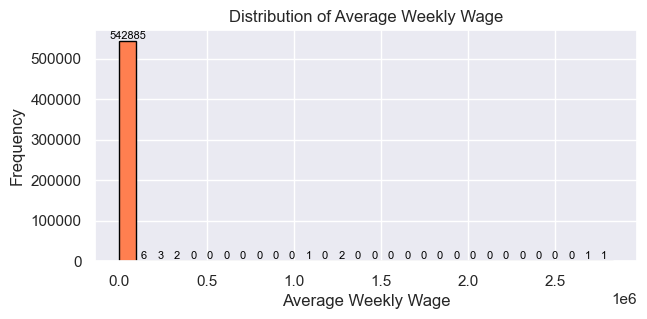

In [595]:
# Continuous Columns: Plotting Histogram with Count Labels Above the Bars
continuous_columns = ['Average Weekly Wage']

for column in continuous_columns:
    plt.figure(figsize=(7, 3))
    # Create histogram and store returned axes
    ax = df[column].plot(kind='hist', bins=30, color='coral', edgecolor='black')
    
    # Add count labels above each bar
    for patch in ax.patches:
        ax.annotate(f'{int(patch.get_height())}', 
                    (patch.get_x() + patch.get_width() / 2, patch.get_height()), 
                    ha='center', va='bottom', fontsize=8, color='black')

    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

Since we have a lot of zeros, we will filtretthe plot.

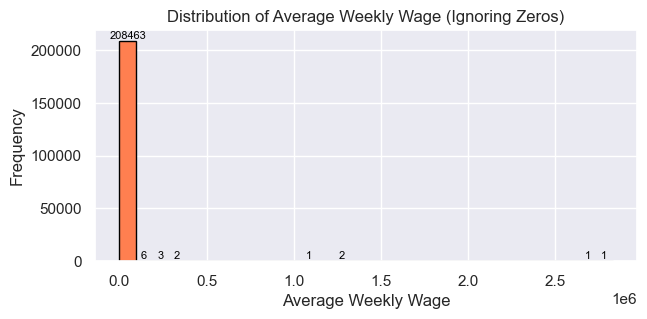

In [599]:
# Continuous Columns: Plotting Histogram with Count Labels Above the Bars, Ignoring Zeros
continuous_columns = ['Average Weekly Wage']

for column in continuous_columns:
    # Filter out rows with value equal to zero
    filtered_data = df[df[column] != 0.00]

    plt.figure(figsize=(7, 3))
    # Create histogram with filtered data and store returned axes
    ax = filtered_data[column].plot(kind='hist', bins=30, color='coral', edgecolor='black')
    
    # Add count labels above each bar
    for patch in ax.patches:
        if patch.get_height() > 0:  # Only add labels if count is greater than 0
            ax.annotate(f'{int(patch.get_height())}', 
                        (patch.get_x() + patch.get_width() / 2, patch.get_height()), 
                        ha='center', va='bottom', fontsize=8, color='black')

    plt.title(f'Distribution of {column} (Ignoring Zeros)')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

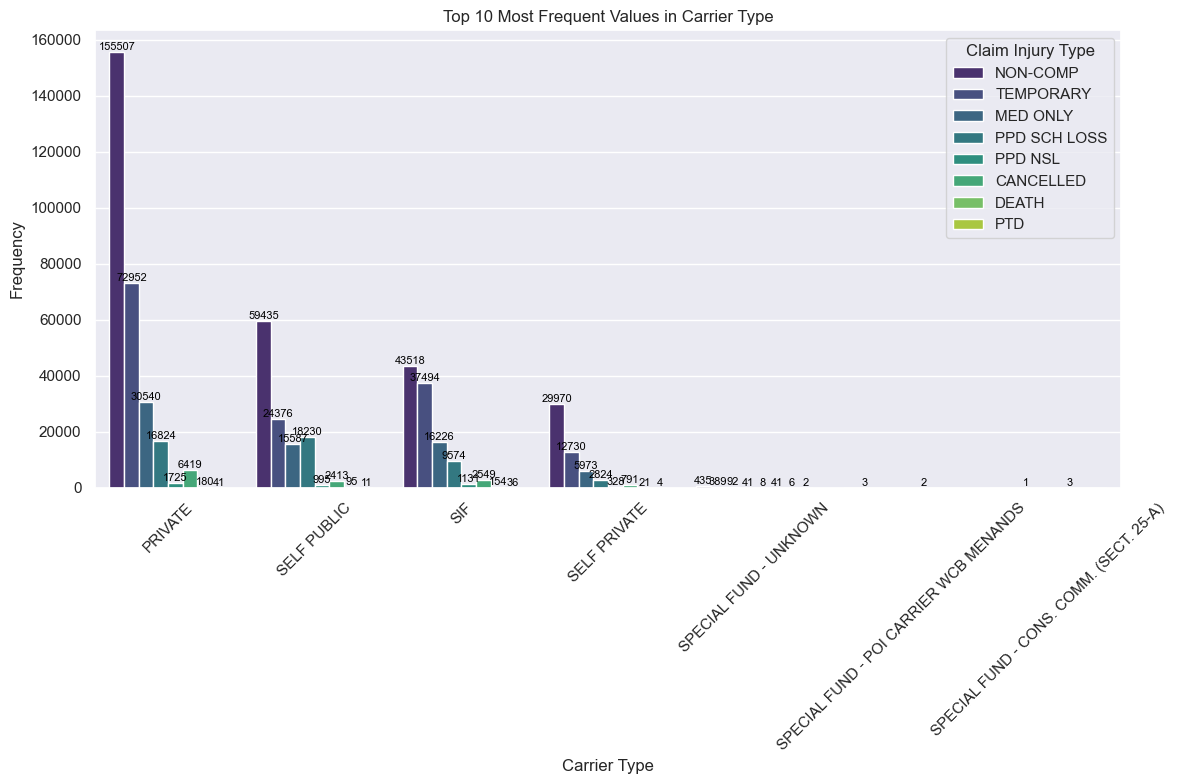

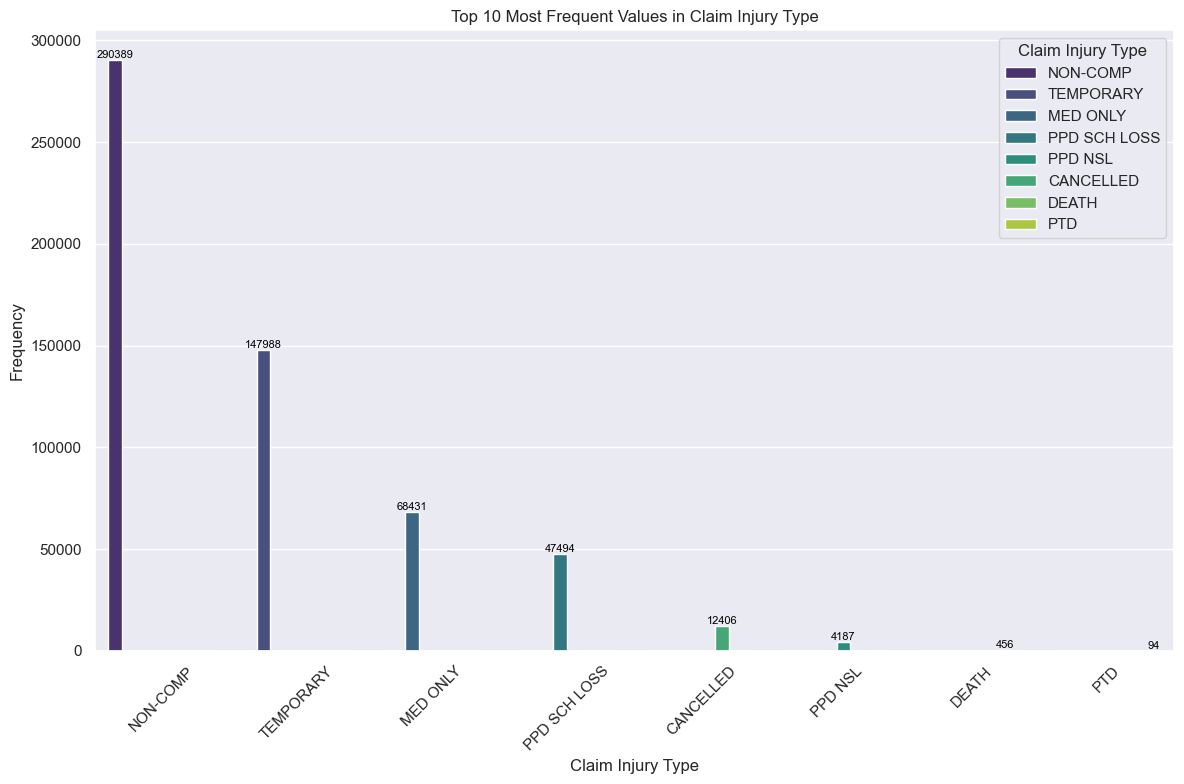

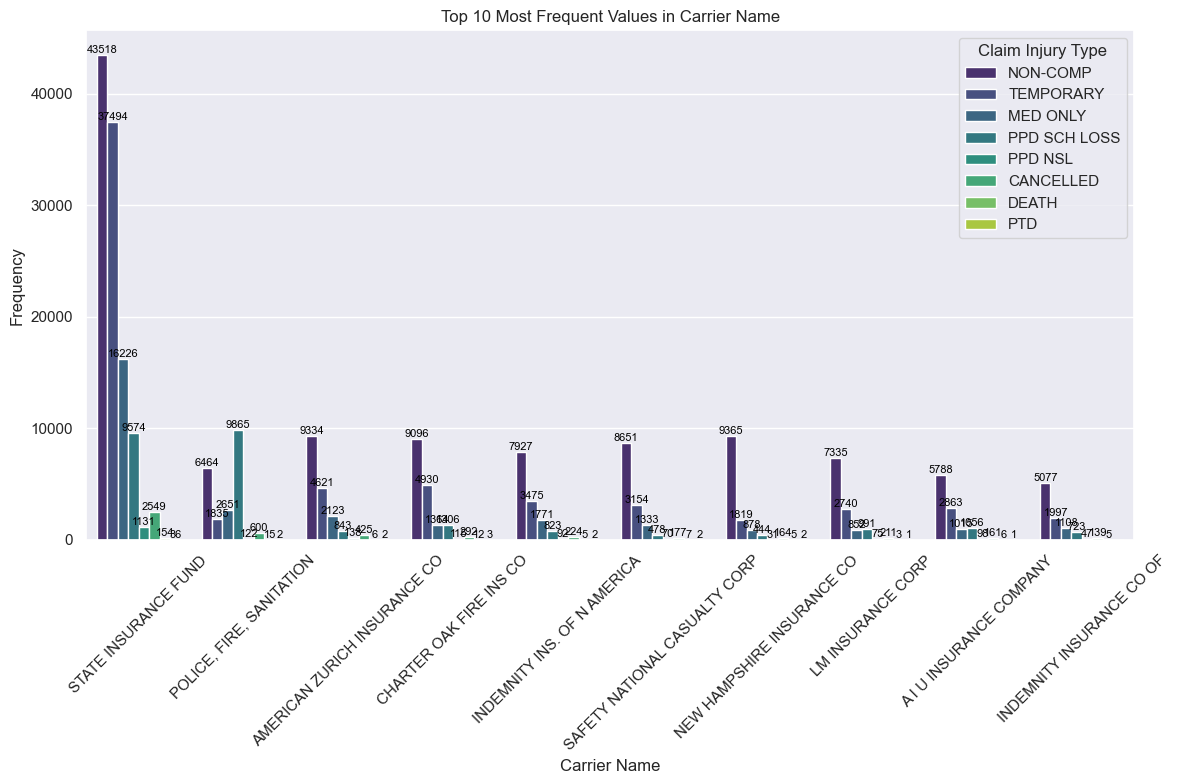

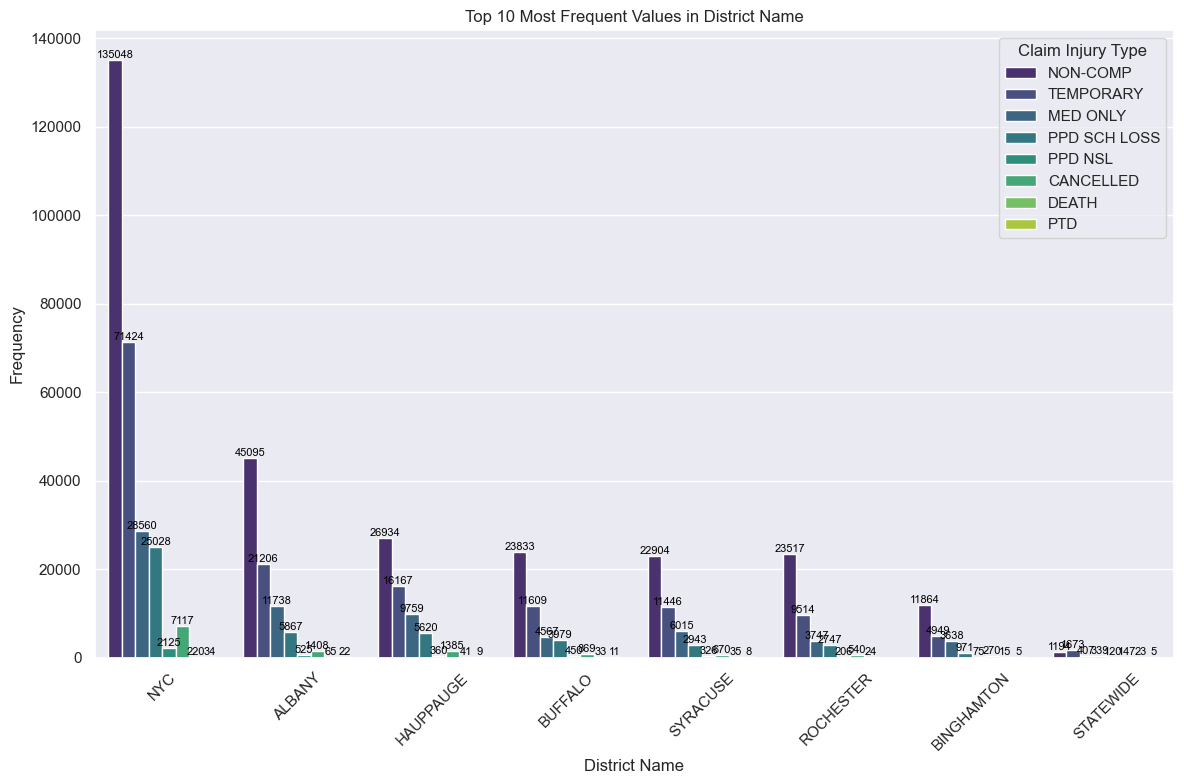

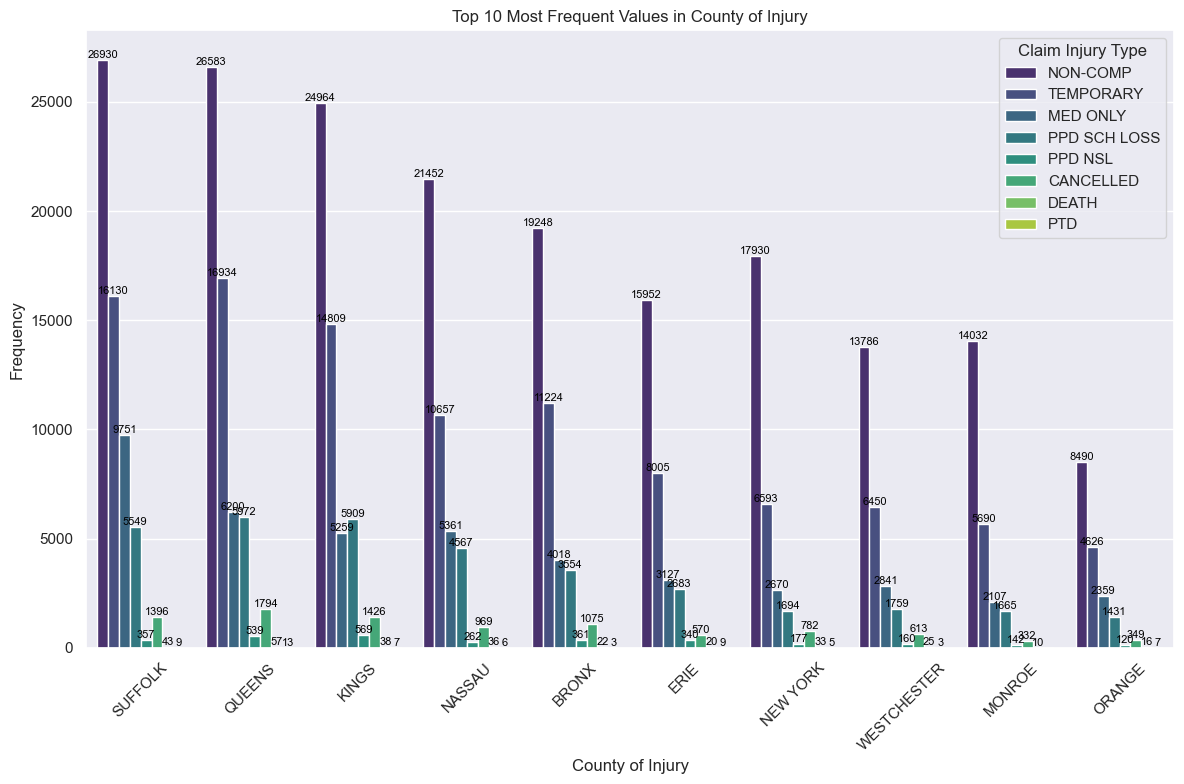

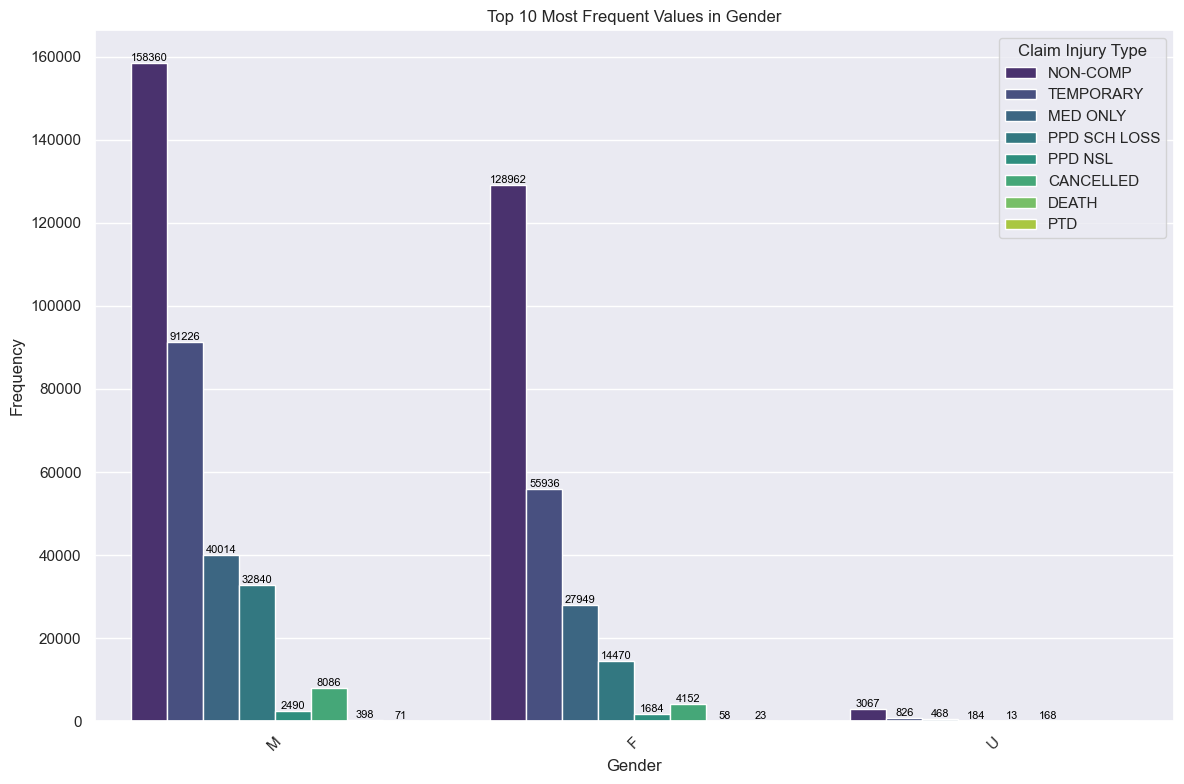

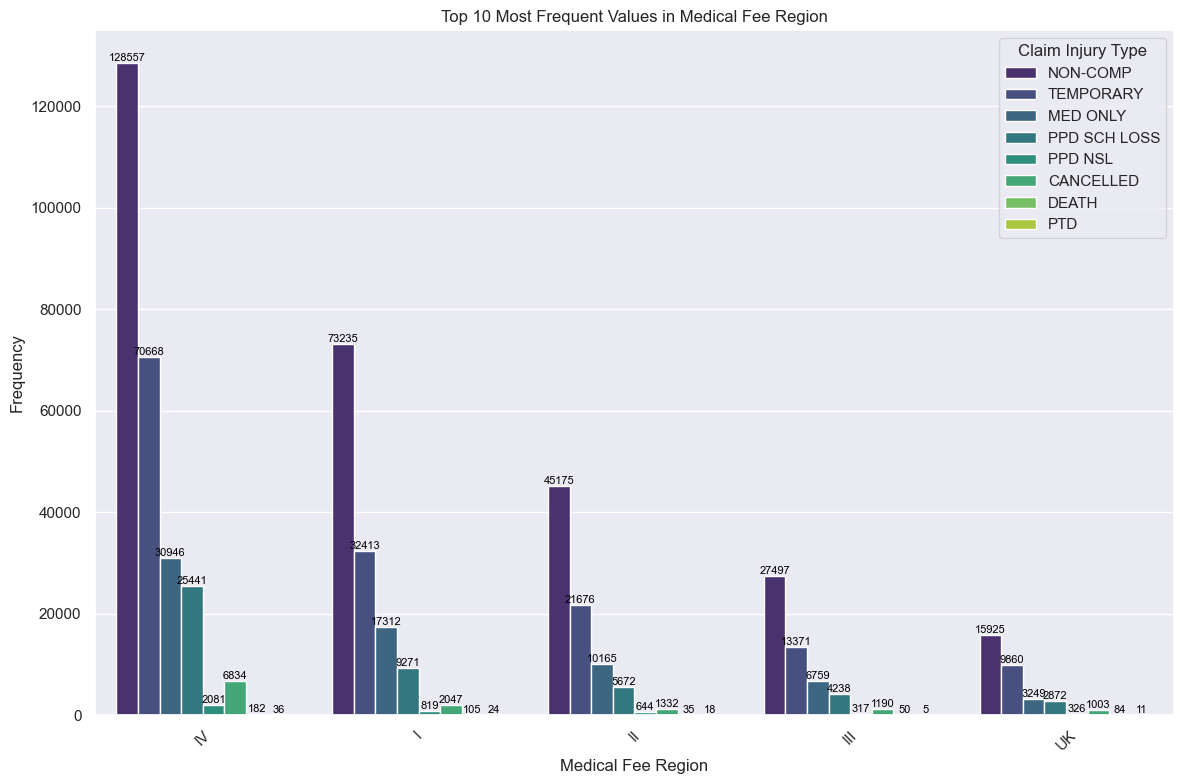

In [602]:
import matplotlib.pyplot as plt
import seaborn as sns

# Categorical Columns: Plotting Frequency Distributions with Target as Hue
categorical_columns = ['Carrier Type', 'Carrier Name', 'District Name', 'County of Injury', 'Gender', 'Medical Fee Region']

# Loop through categorical columns and create separate figures
for column in categorical_columns:
    plt.figure(figsize=(12, 8))
    
    # Plot using seaborn to include hue (target column)
    ax = sns.countplot(data=df, x=column, hue='Claim Injury Type', palette='viridis', order=df[column].value_counts().iloc[:10].index)
    
    # Set title and labels
    plt.title(f'Top 10 Most Frequent Values in {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    
    # Add count labels above each bar
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom', fontsize=8, color='black')

    # Show the plot
    plt.tight_layout()
    plt.show()

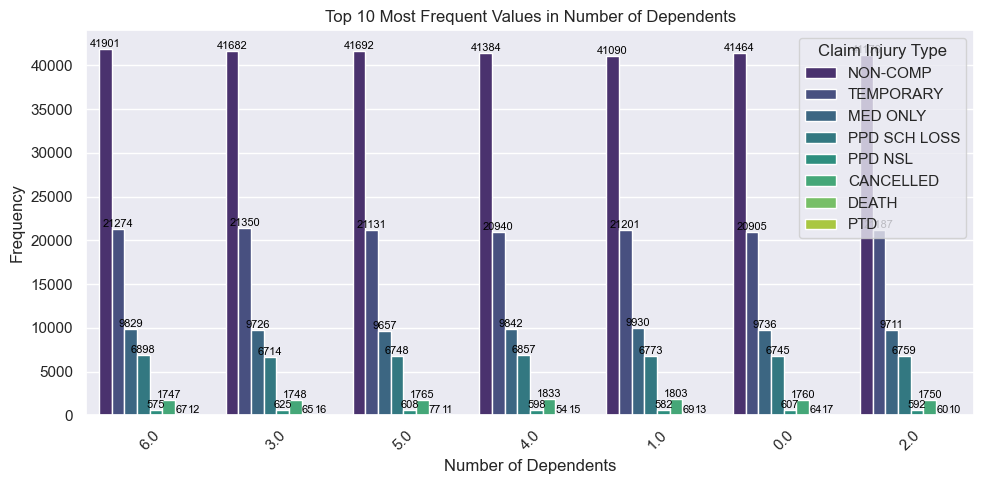

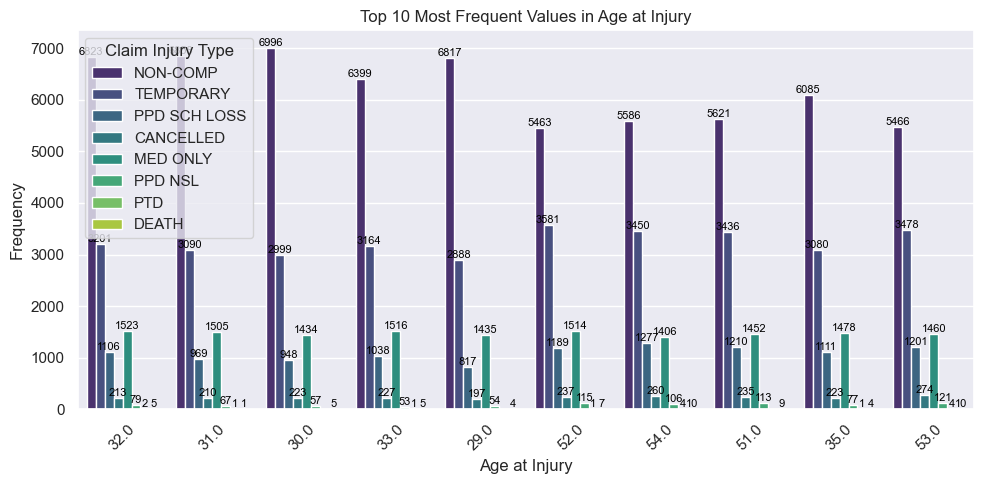

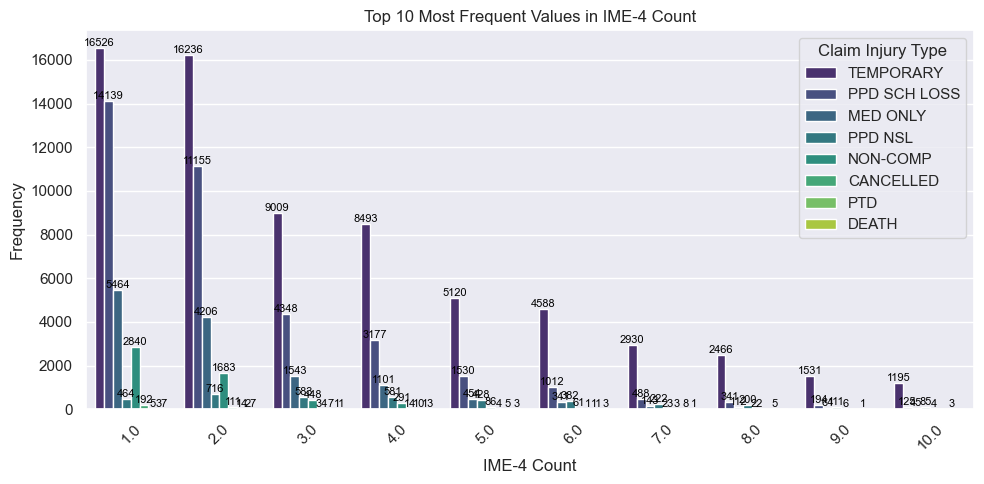

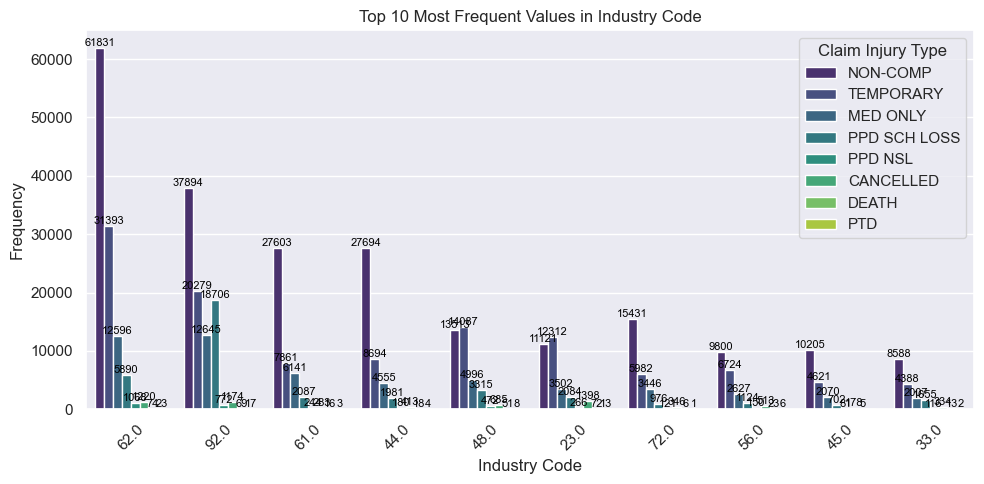

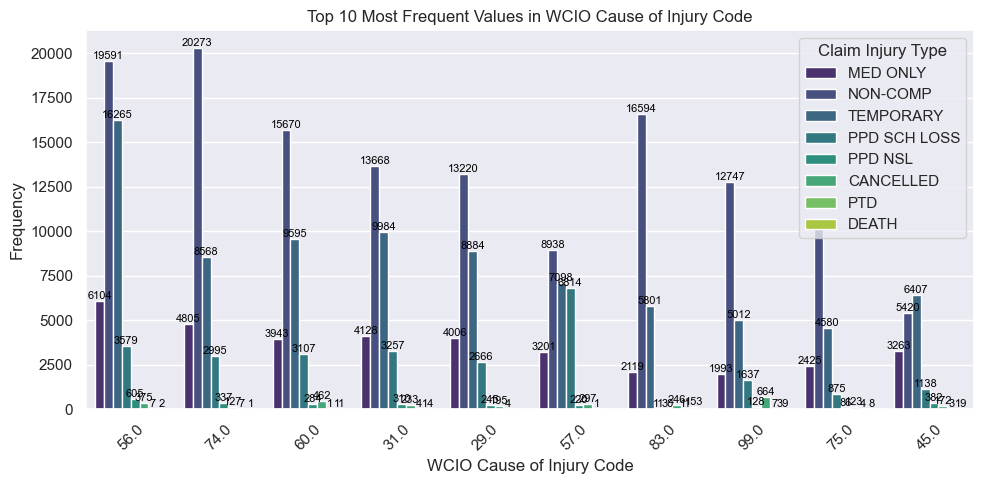

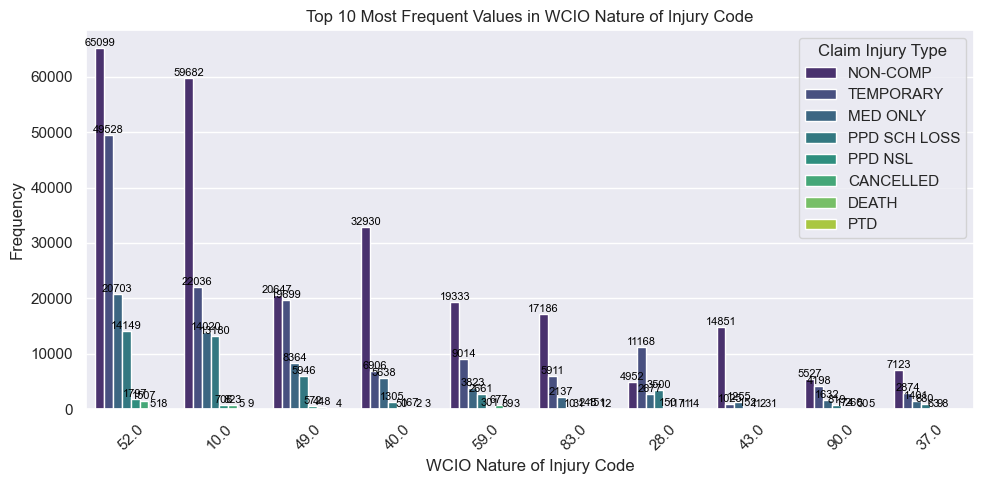

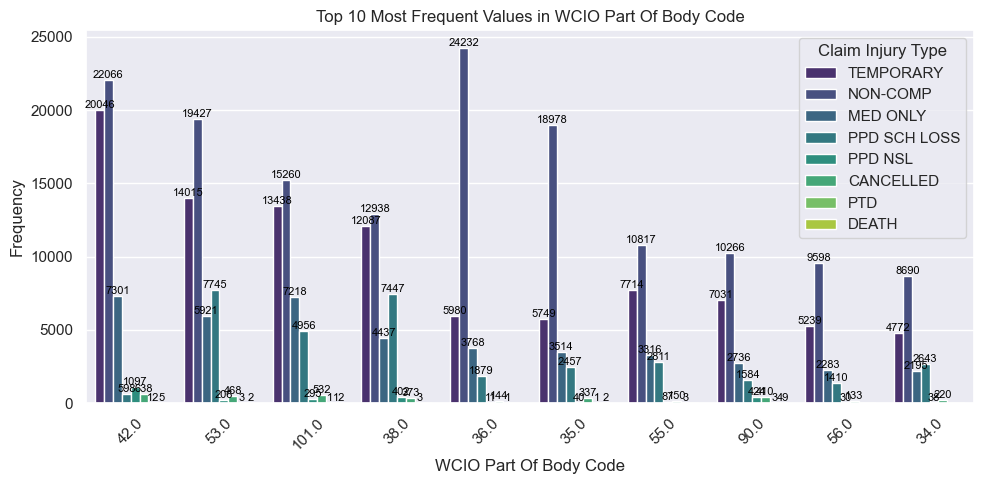

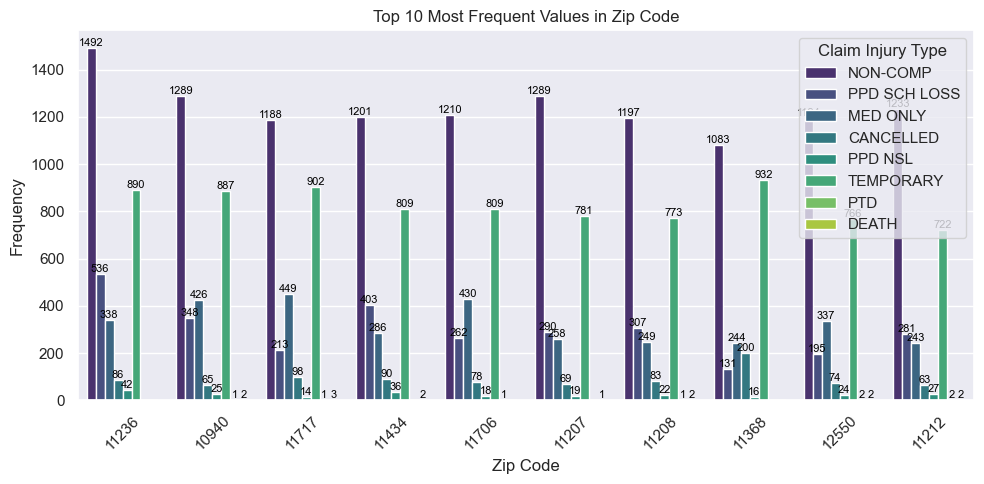

In [606]:
import matplotlib.pyplot as plt
import seaborn as sns

# Discrete Columns: Plotting Top 15 Most Frequent Values with Target as Hue
discrete_columns = ['Number of Dependents', 'Age at Injury', 'IME-4 Count', 'Industry Code', 'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code', 'WCIO Part Of Body Code', 'Zip Code']

# Loop through discrete columns and create separate figures
for column in discrete_columns:
    plt.figure(figsize=(10, 5))
    
    # Select the top 10 most frequent values for the current column
    top_10_values = df[column].value_counts().nlargest(10).index
    
    # Plot using seaborn to include hue (target column)
    ax = sns.countplot(data=df[df[column].isin(top_10_values)], x=column, hue='Claim Injury Type', palette='viridis', order=top_10_values)
    
    # Set title and labels
    plt.title(f'Top 10 Most Frequent Values in {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    
    # Add count labels above each bar
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom', fontsize=8, color='black')

    # Show the plot
    plt.tight_layout()
    plt.show()

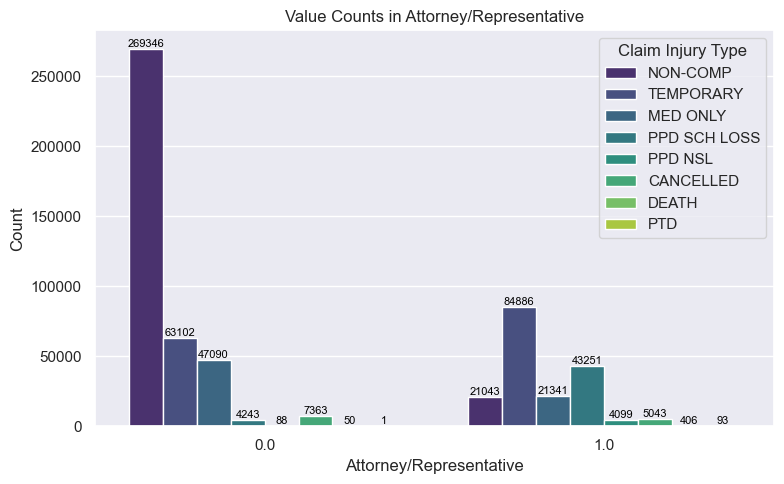

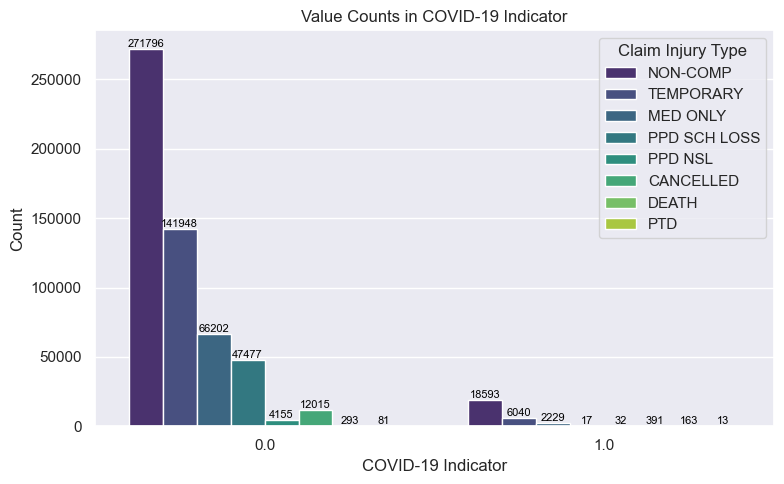

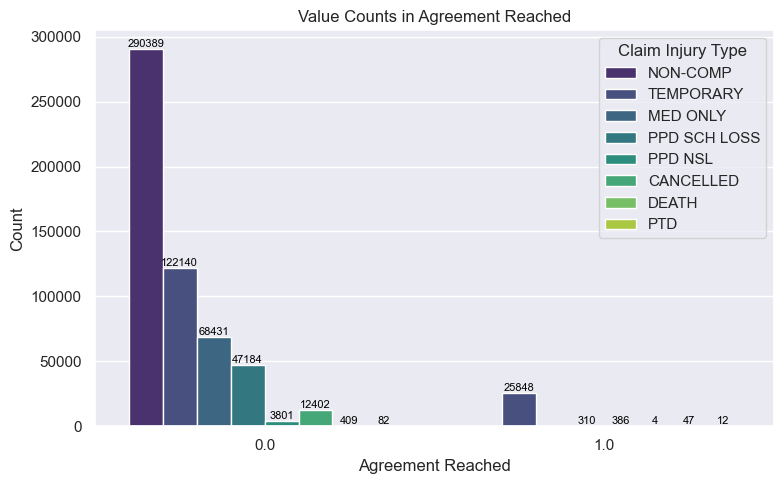

In [607]:
import matplotlib.pyplot as plt
import seaborn as sns

# Binary Columns: Plotting Counts of Values with Target as Hue
binary_columns = ['Attorney/Representative', 'COVID-19 Indicator', 'Agreement Reached']

# Loop through binary columns and create separate figures
for column in binary_columns:
    plt.figure(figsize=(8, 5))
    
    # Plot using seaborn to include hue (target column)
    ax = sns.countplot(data=df, x=column, hue='Claim Injury Type', palette='viridis')
    
    # Set title and labels
    plt.title(f'Value Counts in {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    
    # Add count labels above each bar
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom', fontsize=8, color='black')

    # Show the plot
    plt.tight_layout()
    plt.show()

## 4. Preprocessing the Dataset <a class="anchor" id="chapter4"></a>
In this chapter we will perform the basic steps to get to know our dataset.

## 4.1. Missing Values <a class="anchor" id="section_4_1"></a>


In [608]:
print(df.isnull().sum())

Accident Date                       3687
Age at Injury                      57195
Alternative Dispute Resolution         0
Assembly Date                          0
Attorney/Representative                0
Average Weekly Wage                28544
Birth Year                         54012
C-2 Date                           14527
C-3 Date                          385656
Carrier Name                           0
Carrier Type                        1769
Claim Injury Type                      0
County of Injury                       0
COVID-19 Indicator                     0
District Name                          0
First Hearing Date                422193
Gender                                 0
IME-4 Count                       439826
Industry Code                       9913
Medical Fee Region                     0
WCIO Cause of Injury Code          15589
WCIO Nature of Injury Code         15606
WCIO Part Of Body Code             17046
Zip Code                           28845
Agreement Reache

In [609]:
# Set the threshold for missing values (e.g., more than 40% missing)
threshold = 0.4

# Calculate the percentage of missing values for each column
missing_percentage = df_train.isnull().mean()

# Filter columns that have more than the threshold of missing values
high_missing_columns = missing_percentage[missing_percentage > threshold]

# Display the columns with their missing percentage
print(high_missing_columns)

C-3 Date              0.673803
First Hearing Date    0.737295
IME-4 Count           0.768646
dtype: float64


In [98]:
#First Hearing Date  NaN é de proposito ---> então nao vamos elimianr -> diz que o blank tem significado  

In [99]:
df_train['IME-4 Count'].value_counts()

1.0     40112
2.0     34504
3.0     16136
4.0     13781
5.0      7680
6.0      6427
7.0      3838
8.0      3156
9.0      1915
10.0     1460
11.0     1002
12.0      807
13.0      516
14.0      396
15.0      273
16.0      214
18.0      140
17.0      125
19.0       79
20.0       56
21.0       53
22.0       34
23.0       19
24.0       16
27.0       14
26.0        8
25.0        7
29.0        5
28.0        4
30.0        4
32.0        4
34.0        4
36.0        3
33.0        2
31.0        2
39.0        2
37.0        1
48.0        1
35.0        1
47.0        1
73.0        1
Name: IME-4 Count, dtype: int64

In [100]:
# vamos assumir que NaN em IME-4 Count são realmente 0,porque nao existe nenhum

In [54]:
df = df.drop(['OIICS Nature of Injury Description','C-3 Date'], axis=1)

**WE still have missing values --> for now i will just delete them but we need to think about them**

In [55]:
df.isnull().sum()

Accident Date                         19445
Age at Injury                         19445
Alternative Dispute Resolution        19445
Assembly Date                             0
Attorney/Representative               19445
Average Weekly Wage                   47801
Birth Year                            48260
C-2 Date                              31622
Carrier Name                          19445
Carrier Type                          19445
Claim Identifier                          0
Claim Injury Type                     19445
County of Injury                      19445
COVID-19 Indicator                    19445
District Name                         19445
First Hearing Date                   438820
Gender                                19445
IME-4 Count                          455710
Industry Code                         27922
Industry Code Description             27922
Medical Fee Region                    19445
WCIO Cause of Injury Code             32561
WCIO Cause of Injury Description

In [103]:
df_train = df_train[(df_train['Claim Injury Type'] != 0) & (df_train['Claim Injury Type'].notna())]

In [104]:
df_train.isnull().sum()

Accident Date                          3689
Age at Injury                             0
Alternative Dispute Resolution            0
Assembly Date                             0
Attorney/Representative                   0
Average Weekly Wage                   28651
Birth Year                            54159
C-2 Date                              14560
Carrier Name                              0
Carrier Type                              0
Claim Identifier                          0
Claim Injury Type                         0
County of Injury                          0
COVID-19 Indicator                        0
District Name                             0
First Hearing Date                   423228
Gender                                    0
IME-4 Count                          441223
Industry Code                          9958
Industry Code Description              9958
Medical Fee Region                        0
WCIO Cause of Injury Code             15640
WCIO Cause of Injury Description

In [105]:
df_train['Claim Injury Type'].value_counts()

2. NON-COMP        291078
4. TEMPORARY       148507
3. MED ONLY         68906
5. PPD SCH LOSS     48280
1. CANCELLED        12477
6. PPD NSL           4211
8. DEATH              470
7. PTD                 97
Name: Claim Injury Type, dtype: int64

In [106]:
# ELIMINAR AS DESCRIÇÕES


In [107]:
df_train.isnull().sum()

Accident Date                       3689
Age at Injury                          0
Alternative Dispute Resolution         0
Assembly Date                          0
Attorney/Representative                0
Average Weekly Wage                28651
Birth Year                         54159
C-2 Date                           14560
Carrier Name                           0
Carrier Type                           0
Claim Identifier                       0
Claim Injury Type                      0
County of Injury                       0
COVID-19 Indicator                     0
District Name                          0
First Hearing Date                423228
Gender                                 0
IME-4 Count                       441223
Industry Code                       9958
Medical Fee Region                     0
WCIO Cause of Injury Code          15640
WCIO Nature of Injury Code         15657
WCIO Part Of Body Code             17082
Zip Code                           28637
Agreement Reache

In [ ]:
# se metade das observaões forem Nan, eliminamos a row 

In [ ]:
# calcular Average Weekly Wage com base na Industry Code 

In [24]:
# dar impute com o nn

## 4.2. Outliers <a class="anchor" id="section_4_2"></a>


In [25]:
# Define metric and non-metric features
metric_features = df_train.select_dtypes(include=['number']).columns.tolist()
non_metric_features = df_train.select_dtypes(exclude=['number']).columns.tolist()


# Output the results
print(f"Non-metric features: {non_metric_features}")
print(f"Metric features: {metric_features}")

Non-metric features: ['Accident Date', 'Alternative Dispute Resolution', 'Assembly Date', 'Attorney/Representative', 'C-2 Date', 'Carrier Name', 'Carrier Type', 'Claim Injury Type', 'County of Injury', 'COVID-19 Indicator', 'District Name', 'Gender', 'Industry Code Description', 'Medical Fee Region', 'WCIO Cause of Injury Description', 'WCIO Nature of Injury Description', 'WCIO Part Of Body Description', 'Zip Code', 'WCB Decision']
Metric features: ['Age at Injury', 'Average Weekly Wage', 'Birth Year', 'Claim Identifier', 'Industry Code', 'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code', 'WCIO Part Of Body Code', 'Agreement Reached', 'Number of Dependents']


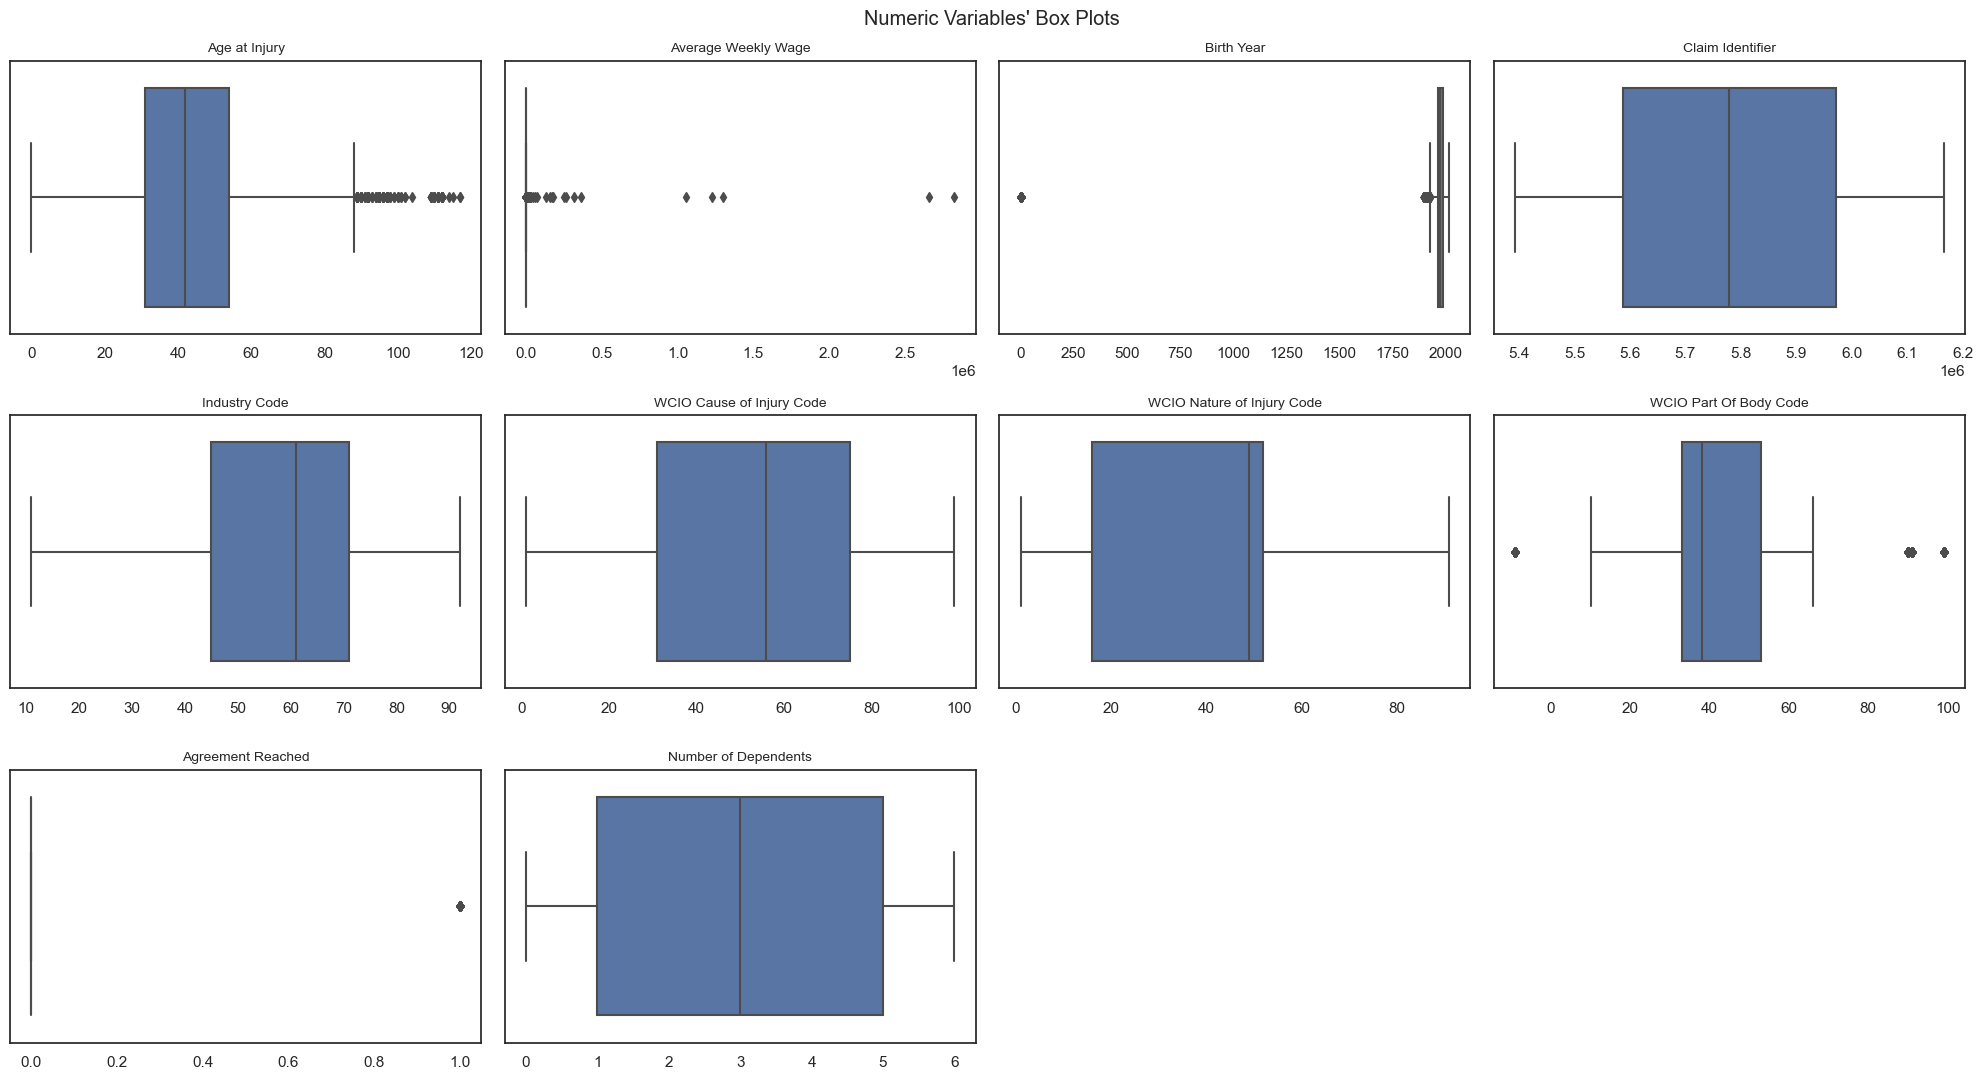

In [26]:
# Plot ALL Numeric Variables' Boxplots in one figure

sns.set_theme(style='white')

# Calculate the number of rows and columns for a square matrix layout
total_features = len(metric_features)
sp_cols = math.ceil(math.sqrt(total_features))  # Columns based on the square root of total features
sp_rows = math.ceil(total_features / sp_cols)   # Rows to accommodate all features

# Prepare figure. Create individual axes where each boxplot will be placed
fig, axes = plt.subplots(sp_rows, 
                         sp_cols, 
                         figsize=(20, 11),
                         tight_layout=True
                        )

# Plot data
# Iterate across axes objects and associate each boxplot. Hint: don't forget to attach the boxplot to the current ax
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    sns.boxplot(x=df_train[feat], ax=ax)
    ax.set_title(feat, fontsize=10)  # Set title
    ax.xaxis.set_label_position('top')  # Move the label to the top
    ax.set_xlabel('')  # Remove the default x-axis label at the bottom

# Remove empty subplots if there are more axes than features
for ax in axes.flatten()[len(metric_features):]:
    fig.delaxes(ax)
    
# Layout
title = "Numeric Variables' Box Plots"
plt.suptitle(title)

# Save the figure
# plt.savefig(os.path.join('..', 'figures', 'eda', 'numeric_variables_boxplots.png'), dpi=200)

plt.show()

# Reset theme to "darkgrid"
sns.set()

Also here we can really calculate the interquantile range and blablabla and explore more the outliers

## 4.3. Categorical Features <a class="anchor" id="section_4_3"></a>
What should we do? encoding?

In [50]:
features_categorical = [
    'Alternative Dispute Resolution',
    'Attorney/Representative',
    'COVID-19 Indicator',
    'County of Injury',
    'Carrier Type',
    'District Name',
    'Gender',
    'Industry Code Description',
    'Medical Fee Region'
]

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

Alternative Dispute Resolution
object


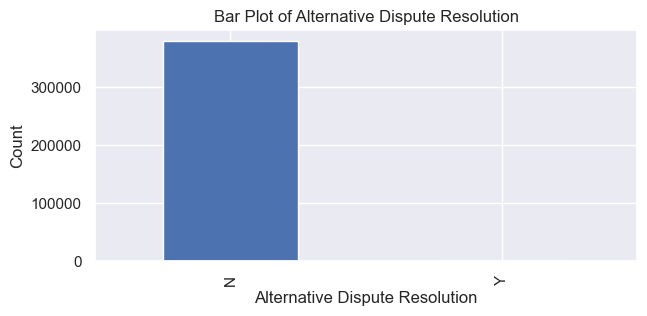

Attorney/Representative
object


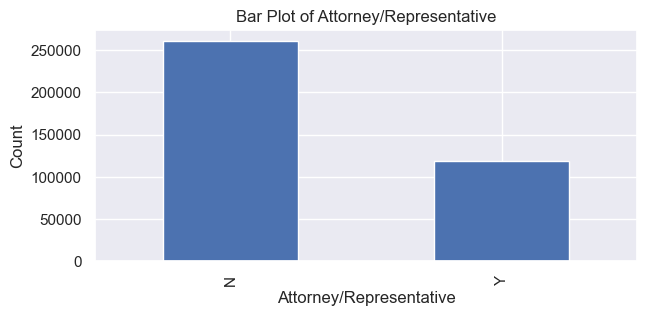

COVID-19 Indicator
object


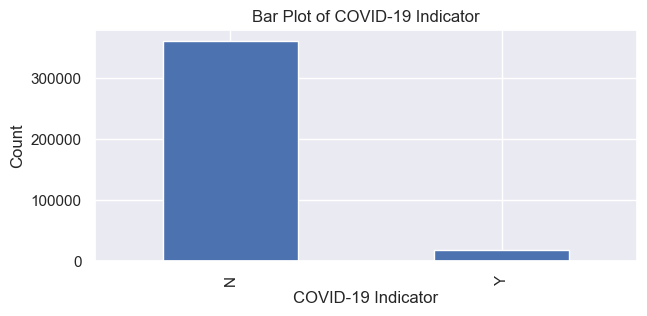

County of Injury
object


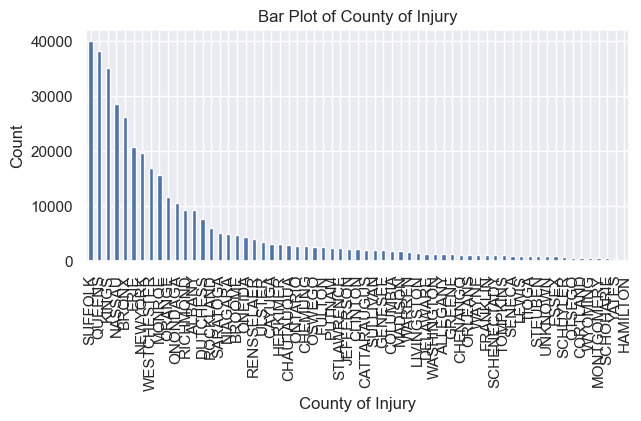

Carrier Type
object


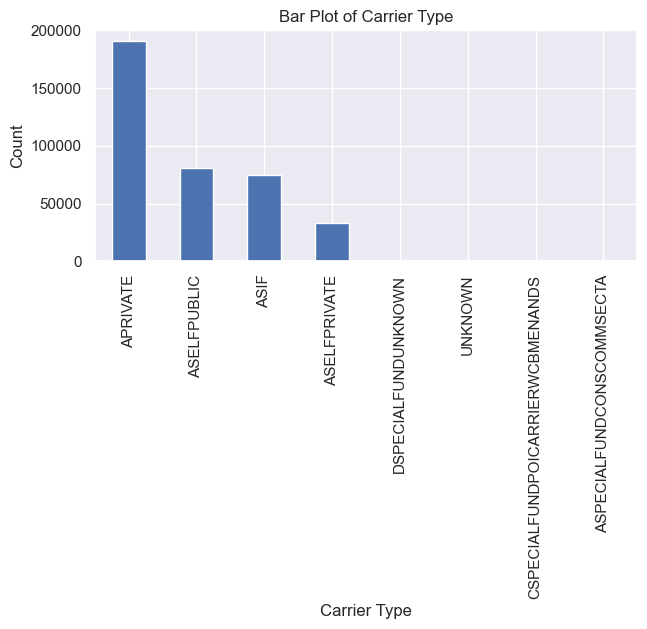

District Name
object


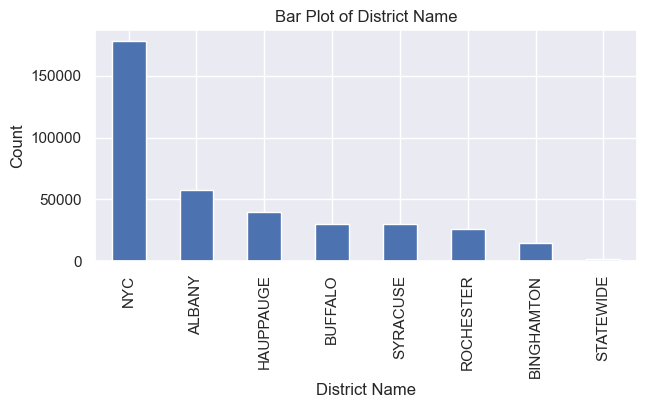

Gender
object


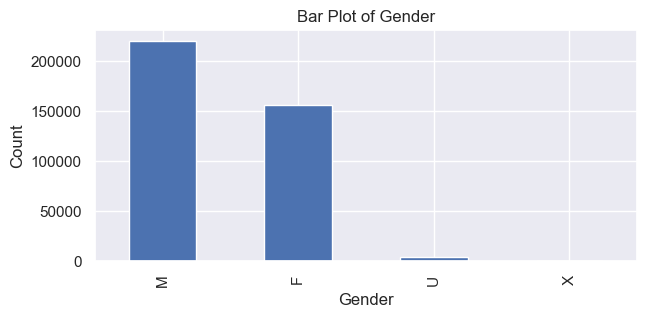

Industry Code Description
object


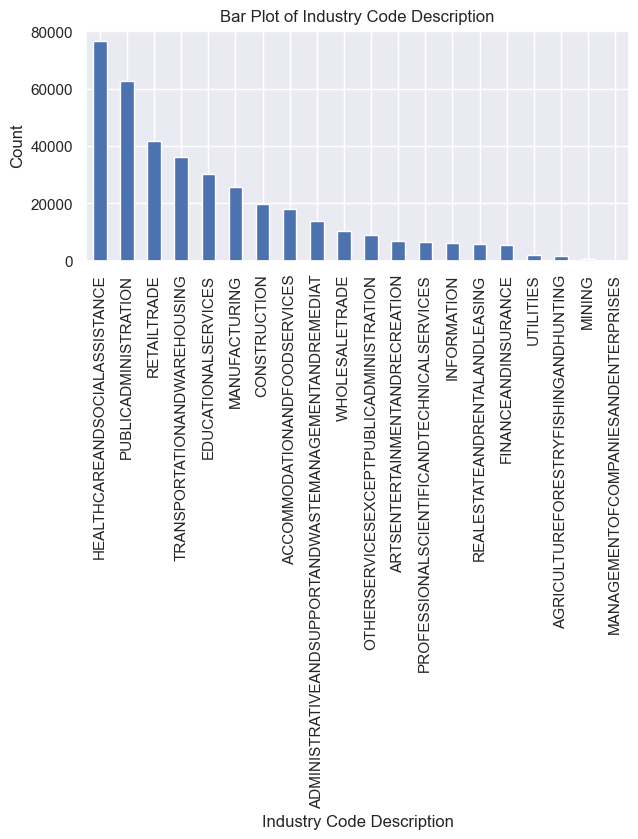

Medical Fee Region
object


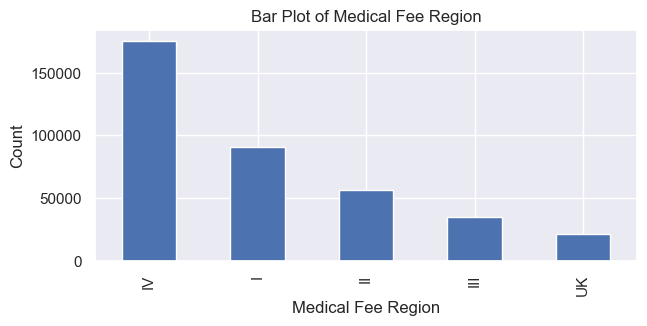

In [72]:
for feature in features_categorical:
    print(feature)
    print(X_train[feature].dtype)
    X_train[feature].value_counts().plot(kind='bar', figsize=(7, 3))
    plt.title(f'Bar Plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

In [ ]:
df_train.info()

In [73]:
df_train['Industry Code Description'] = df_train['Industry Code Description'].astype('category')
df_train['Attorney/Representative'] = df_train['Attorney/Representative'].astype('category')


In [75]:
df_train[features_categorical].dtypes

Alternative Dispute Resolution    category
Attorney/Representative           category
COVID-19 Indicator                category
County of Injury                  category
Carrier Type                      category
District Name                     category
Gender                            category
Industry Code Description         category
Medical Fee Region                category
dtype: object

# 5. Feature Engineering <a class="anchor" id="chapter5"></a>

here we should think about creating new features

# 6. Feature Selection <a class="anchor" id="chapter6"></a>
To start with the feature selection we first need to split our train dataset into X and y. And then split into train and validation.

In [27]:
X= df_train.drop('Claim Injury Type',axis=1)
y=df_train['Claim Injury Type']

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler # we need to choose one

In [29]:
X_train, X_val, y_train, y_val = train_test_split(X,y, 
                                                  test_size = 0.2, 
                                                  random_state = 42,
                                                  stratify = y, 
                                                  shuffle = True)

 ## 6.1. Scale the Data</b> <a class="anchor" id="section_6_1"></a>


In [30]:
numerical_columns = df_train.select_dtypes(include=['float64', 'int64']).columns

In [31]:
#scaling features
feat_scaler = RobustScaler()
X_train[numerical_columns] = feat_scaler.fit_transform(X_train[numerical_columns])

#apply same transformation for test data
X_val[numerical_columns] = feat_scaler.transform(X_val[numerical_columns])

 ## 6.2. Numerical Features</b> <a class="anchor" id="section_6_2"></a>

 > ### Spearman and Pearson correlation matrix <a class="anchor" id="sub_section_4_1_2"></a>

In [32]:
def cor_heatmap(cor, name):
    plt.figure(figsize=(18,12))
    sns.heatmap(data = cor.round(2), annot = True, cmap = 'viridis', linecolor = 'white', linewidth=0.5, fmt='.2', mask=np.triu(cor, k=0))
    plt.title(f'{name} Correlation Matrix', fontdict = {'fontsize': 20})
    plt.show()

In [33]:
#we have to create features_continuous 

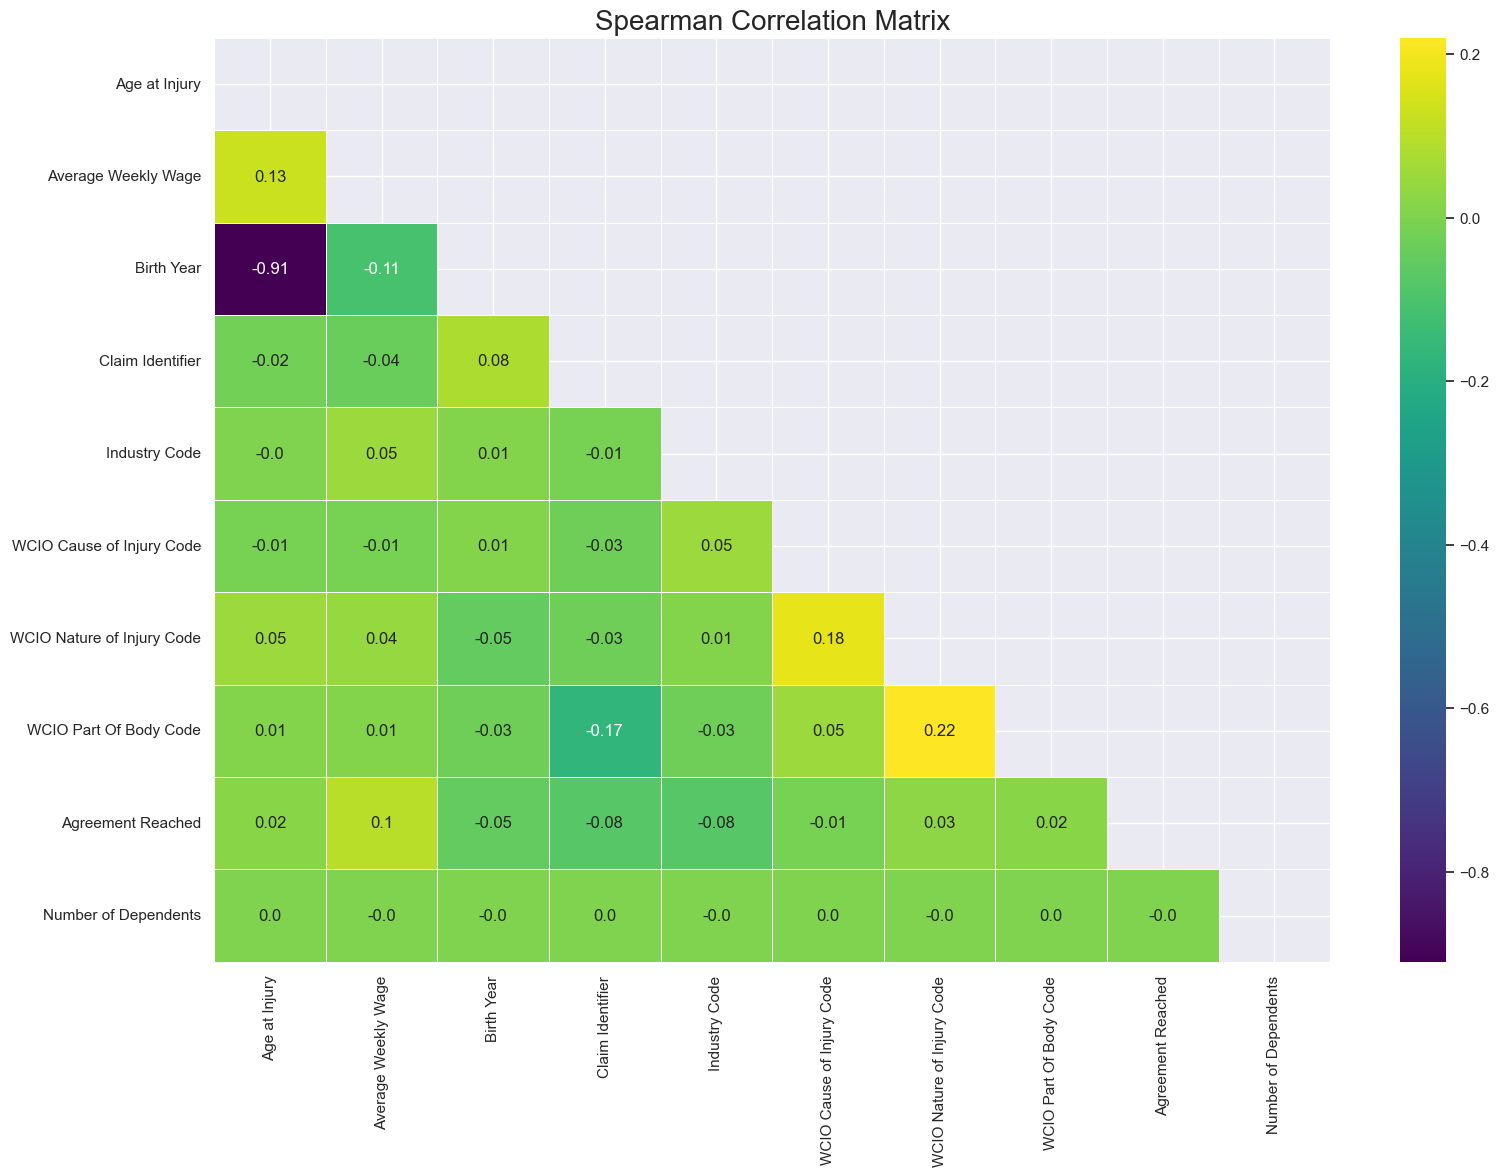

In [34]:
corr_data_numerical = df_train[numerical_columns]
# corr_data_continuous = df_train[features_continuous]
cor_spearman = corr_data_numerical.corr(method='spearman')
# cor_pearson = corr_data_continuous.corr(method='pearson')

cor_heatmap(cor_spearman, 'Spearman')
# cor_heatmap(cor_pearson, 'Pearson')

 > ### LASSO Regression <a class="anchor" id="sub_section_4_1_3"></a>

In [ ]:
#fit regression
reg = LassoCV().fit(X_train[features_continuous], y_train)
#get coefficients
coef = pd.Series(reg.coef_, index = X_train[features_continuous].columns)
#obtain coef values
coef.sort_values()

In [ ]:
def plot_importance(coef,name):
    imp_coef = coef.sort_values()
    plt.figure(figsize=(3,5))
    imp_coef.plot(kind = "barh", color='c')
    plt.title("Feature importance using " + name + " Model")
    plt.show()

In [ ]:
plot_importance(coef,'Lasso')

 > ### Recursive Feature Elimination - RFE <a class="anchor" id="sub_section_4_1_4"></a>

In [109]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [53]:
# Number of features
nof_list=np.arange(1,27)            
high_score=0
# Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    model = LogisticRegression()
    rfe = RFE(model,n_features_to_select = nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train[numerical_columns],y_train)
    X_val_rfe = rfe.transform(X_val[numerical_columns])
    model.fit(X_train_rfe,y_train)
    
    score = model.score(X_val_rfe,y_val)
    score_list.append(score)
    
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

c:\Users\xandg\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\xandg\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Optimum number of features: 9
Score with 9 features: 0.761508


In [36]:
#rfscv- to select 1st the number of features we should select
model = LogisticRegression()
rfe = RFE(estimator = model, n_features_to_select = 9)

In [37]:
X_rfe= rfe.fit_transform(X=X_train[numerical_columns], y=y_train)

c:\Users\xandg\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\xandg\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [38]:
selected_features = pd.Series(rfe.support_, index = X_train[numerical_columns].columns)
selected_features

Age at Injury                  True
Average Weekly Wage            True
Birth Year                     True
Claim Identifier               True
Industry Code                  True
WCIO Cause of Injury Code      True
WCIO Nature of Injury Code     True
WCIO Part Of Body Code         True
Agreement Reached              True
Number of Dependents          False
dtype: bool

 ## 6.3. Categorical Features</b> <a class="anchor" id="section_6_3"></a>
Chi-squared and MIC for the categorical ones.

In [110]:
X_train.head(4).T


,214651,227461,174160,181816
Accident Date,2021-03-01 00:00:00,2021-03-13 00:00:00,2020-12-06 00:00:00,2020-12-16 00:00:00
Age at Injury,-0.217391,-0.26087,0.434783,0.608696
Alternative Dispute Resolution,N,N,N,N
Assembly Date,2021-03-03 00:00:00,2021-03-26 00:00:00,2020-12-17 00:00:00,2021-01-05 00:00:00
Attorney/Representative,N,N,Y,Y
Average Weekly Wage,0.0,0.0,0.0,0.781088
Birth Year,0.25,0.291667,-0.375,-82.375
C-2 Date,2021-03-03 00:00:00,2021-03-26 00:00:00,2021-10-13 00:00:00,2020-12-28 00:00:00
Carrier Name,BEACON CITY SCHOOL DISTRICT,STATE INSURANCE FUND,"CNY OTHER THAN ED, HED WATER",CONTINENTAL INDEMNITY COMPANY
Carrier Type,ASELFPUBLIC,ASIF,ASELFPUBLIC,APRIVATE


 > ### $\chi ^2$ Test for Independence <a class="anchor" id="sub_section_4_2_1"></a>

In [111]:
from sklearn.feature_selection import mutual_info_classif, chi2, SelectKBest


In [112]:
from sklearn.preprocessing import LabelEncoder

# Initialize a LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to each categorical column
for col in features_categorical:
    X_train[col] = label_encoder.fit_transform(X_train[col])
    X_val[col] = label_encoder.transform(X_val[col])


In [117]:
#Chi-square test
threshold = 5 #we want to only keep the 4 most relevant features
high_score_features_chi2 = []
scores = []
names_Chi2 = []

feature_scores = SelectKBest(chi2, k=threshold).fit(X_train[features_categorical],y_train).scores_

high_score_features = []
for score, f_name in sorted(zip(feature_scores,X_train[features_categorical].columns), reverse=True)[:threshold]:
        high_score_features_chi2.append(f_name)
        scores.append(score)
        names_Chi2.append(f_name)

> ### Mutual Information Criterion <a class="anchor" id="sub_section_4_2_2"></a>

In [118]:
 #MIC 
threshold = 5 #we want to only keep the 4 most relevant features
high_score_features_MIC = []
scores = []
names_MIC = []
feature_scores = mutual_info_classif(X_train[features_categorical],y_train, random_state=0)
for score, f_name in sorted(zip(feature_scores, X_train[features_categorical].columns), reverse=True)[:threshold]:
        high_score_features_MIC.append(f_name)
        scores.append(score)
        names_MIC.append(f_name)

In [119]:
common_categorical_features = list(set(names_Chi2).intersection(list(names_MIC)))
features_selected = common_categorical_features

In [120]:
features_selected

['Industry Code Description',
 'Attorney/Representative',
 'Carrier Type',
 'Medical Fee Region']

 ## 6.4. Final Features</b> <a class="anchor" id="section_6_4"></a>
Make that beautiful table, where we say in which case we reject each variable and then the final decision

# 7. Modeling <a class="anchor" id="chapter7"></a>
